In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
df.head()

Customer ID  Age Gender Loyalty Member Product Type      SKU  Rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   
1         1000   53   Male             No       Tablet  SKU1002       3   
2         1002   41   Male             No       Laptop  SKU1005       3   
3         1002   41   Male            Yes   Smartphone  SKU1004       2   
4         1003   75   Male            Yes   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   
1    Completed         Paypal       741.09      247.03         3   
2    Completed    Credit Card      1855.84      463.96         4   
3    Completed           Cash      3164.76      791.19         4   
4    Completed           Cash        41.50       20.75         2   

  Purchase Date Shipping Type              Add-ons Purchased  Add-on Total  
0    2024-03-20      Standard  Accessory,Accessory,Accessory         40.21  
1    2024-04-20     Overnight                   Impulse Item         26.09  
2    2023-10-17       Express                            NaN          0.00  
3    2024-08-09     Overnight      Impulse Item,Impulse Item         60.16  
4    2024-05-21       Express                      Accessory         35.56

In [3]:
data = df.copy()

In [4]:
data.drop(columns = ['Customer ID', 'SKU', 'Purchase Date'], axis = 1, inplace = True)

In [5]:
data.head()

Age Gender Loyalty Member Product Type  Rating Order Status Payment Method  \
0   53   Male             No   Smartphone       2    Cancelled    Credit Card   
1   53   Male             No       Tablet       3    Completed         Paypal   
2   41   Male             No       Laptop       3    Completed    Credit Card   
3   41   Male            Yes   Smartphone       2    Completed           Cash   
4   75   Male            Yes   Smartphone       5    Completed           Cash   

   Total Price  Unit Price  Quantity Shipping Type  \
0      5538.33      791.19         7      Standard   
1       741.09      247.03         3     Overnight   
2      1855.84      463.96         4       Express   
3      3164.76      791.19         4     Overnight   
4        41.50       20.75         2       Express   

               Add-ons Purchased  Add-on Total  
0  Accessory,Accessory,Accessory         40.21  
1                   Impulse Item         26.09  
2                            NaN          0.00  
3      Impulse Item,Impulse Item         60.16  
4                      Accessory         35.56

In [6]:
data.shape

(20000, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                20000 non-null  int64  
 1   Gender             19999 non-null  object 
 2   Loyalty Member     20000 non-null  object 
 3   Product Type       20000 non-null  object 
 4   Rating             20000 non-null  int64  
 5   Order Status       20000 non-null  object 
 6   Payment Method     20000 non-null  object 
 7   Total Price        20000 non-null  float64
 8   Unit Price         20000 non-null  float64
 9   Quantity           20000 non-null  int64  
 10  Shipping Type      20000 non-null  object 
 11  Add-ons Purchased  15132 non-null  object 
 12  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.0+ MB


In [8]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(data[column].value_counts())
        print('-----------------------------------------------')

Gender
Male      10164
Female     9835
Name: count, dtype: int64
-----------------------------------------------
Loyalty Member
No     15657
Yes     4343
Name: count, dtype: int64
-----------------------------------------------
Product Type
Smartphone    5978
Tablet        4104
Laptop        3973
Smartwatch    3934
Headphones    2011
Name: count, dtype: int64
-----------------------------------------------
Order Status
Completed    13432
Cancelled     6568
Name: count, dtype: int64
-----------------------------------------------
Payment Method
Credit Card      5868
Bank Transfer    3371
PayPal           3284
Paypal           2514
Cash             2492
Debit Card       2471
Name: count, dtype: int64
-----------------------------------------------
Shipping Type
Standard     6725
Express      3366
Overnight    3357
Same Day     3280
Expedited    3272
Name: count, dtype: int64
-----------------------------------------------
Add-ons Purchased
Extended Warranty                               

In [9]:
data.drop(columns = ['Add-ons Purchased'], axis = 'columns', inplace = True)

In [10]:
data.isnull().sum()

Age               0
Gender            1
Loyalty Member    0
Product Type      0
Rating            0
Order Status      0
Payment Method    0
Total Price       0
Unit Price        0
Quantity          0
Shipping Type     0
Add-on Total      0
dtype: int64

In [11]:
data.dropna(subset = ['Gender'], inplace = True)

In [12]:
data.apply(pd.isnull).sum()

Age               0
Gender            0
Loyalty Member    0
Product Type      0
Rating            0
Order Status      0
Payment Method    0
Total Price       0
Unit Price        0
Quantity          0
Shipping Type     0
Add-on Total      0
dtype: int64

In [13]:
data.shape

(19999, 12)

In [14]:
data.duplicated().sum()

17

In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data.shape

(19982, 12)

In [17]:
data.describe()

Age        Rating   Total Price    Unit Price      Quantity  \
count  19982.000000  19982.000000  19982.000000  19982.000000  19982.000000   
mean      49.000901      3.094135   3179.594797    578.600987      5.484936   
std       18.036464      1.224059   2544.607504    312.287721      2.870710   
min       18.000000      1.000000     20.750000     20.750000      1.000000   
25%       33.000000      2.000000   1139.680000    361.180000      3.000000   
50%       49.000000      3.000000   2534.490000    463.960000      5.000000   
75%       65.000000      4.000000   4639.600000    791.190000      8.000000   
max       80.000000      5.000000  11396.800000   1139.680000     10.000000   

       Add-on Total  
count  19982.000000  
mean      62.300919  
std       58.054496  
min        0.000000  
25%        7.987500  
50%       51.740000  
75%       93.882500  
max      292.770000

In [18]:
data.head()

Age Gender Loyalty Member Product Type  Rating Order Status Payment Method  \
0   53   Male             No   Smartphone       2    Cancelled    Credit Card   
1   53   Male             No       Tablet       3    Completed         Paypal   
2   41   Male             No       Laptop       3    Completed    Credit Card   
3   41   Male            Yes   Smartphone       2    Completed           Cash   
4   75   Male            Yes   Smartphone       5    Completed           Cash   

   Total Price  Unit Price  Quantity Shipping Type  Add-on Total  
0      5538.33      791.19         7      Standard         40.21  
1       741.09      247.03         3     Overnight         26.09  
2      1855.84      463.96         4       Express          0.00  
3      3164.76      791.19         4     Overnight         60.16  
4        41.50       20.75         2       Express         35.56

In [19]:
categorical_columns, numerical_columns = [], []
for column in data.columns:
    if data[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [20]:
categorical_columns

['Gender',
 'Loyalty Member',
 'Product Type',
 'Order Status',
 'Payment Method',
 'Shipping Type']

In [21]:
numerical_columns

['Age', 'Rating', 'Total Price', 'Unit Price', 'Quantity', 'Add-on Total']

In [22]:
data['Payment Method'].value_counts()

Payment Method
Credit Card      5865
Bank Transfer    3370
PayPal           3283
Paypal           2511
Cash             2487
Debit Card       2466
Name: count, dtype: int64

In [23]:
data['Payment Method'] = data['Payment Method'].str.replace('Paypal', 'PayPal')

In [24]:
data['Payment Method'].value_counts()

Payment Method
Credit Card      5865
PayPal           5794
Bank Transfer    3370
Cash             2487
Debit Card       2466
Name: count, dtype: int64

In [25]:
for column in categorical_columns:
    print(data.groupby(column).mean(numeric_only = True))
    print('===================================================================================')

              Age    Rating  Total Price  Unit Price  Quantity  Add-on Total
Gender                                                                      
Female  48.841323  3.103104  3192.465938  580.010039  5.476234     63.678505
Male    49.155262  3.085458  3167.144373  577.237993  5.493354     60.968362
                      Age    Rating  Total Price  Unit Price  Quantity  \
Loyalty Member                                                           
No              48.998849  3.091101  3191.149758  579.520884  5.492392   
Yes             49.008295  3.105069  3137.949016  575.285541  5.458065   

                Add-on Total  
Loyalty Member                
No                 62.286873  
Yes                62.351544  
                    Age    Rating  Total Price  Unit Price  Quantity  \
Product Type                                                           
Headphones    48.239184  2.993536  2009.647061  361.411159  5.560915   
Laptop        48.772544  2.984635  3095.133081  567.933

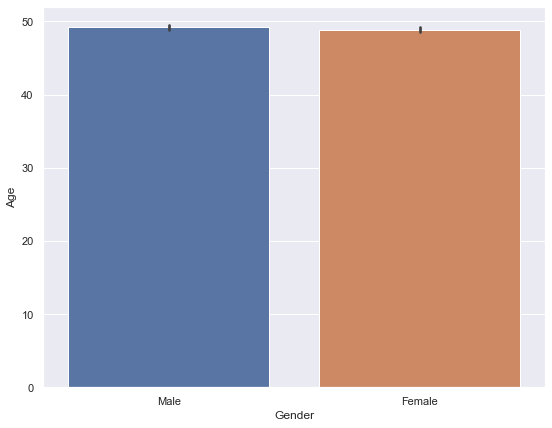

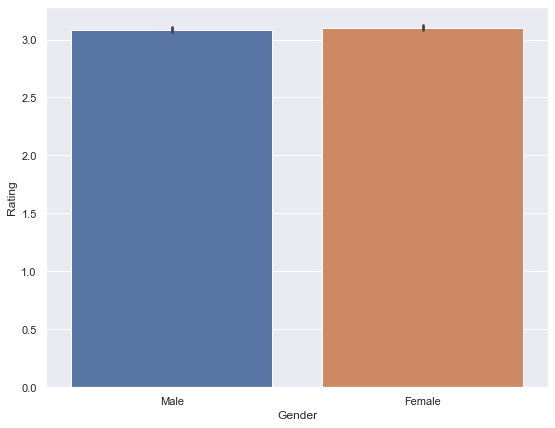

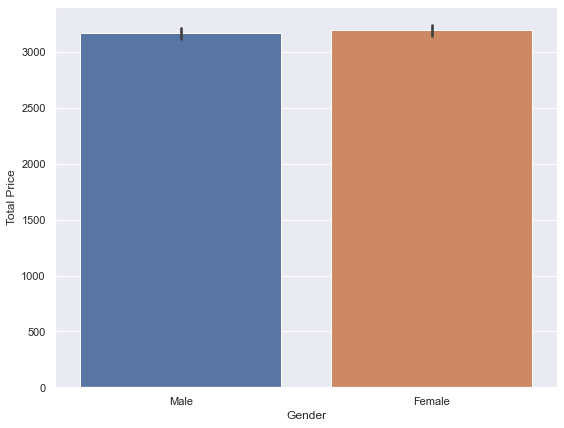

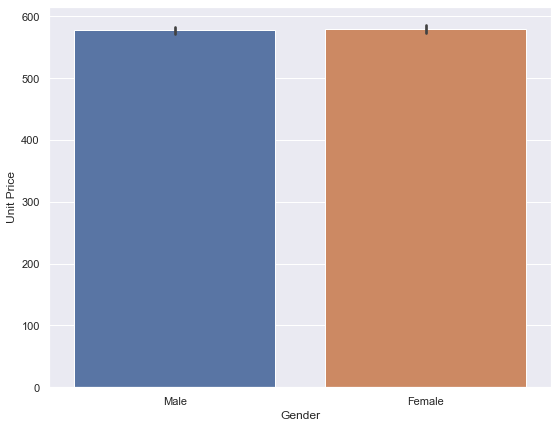

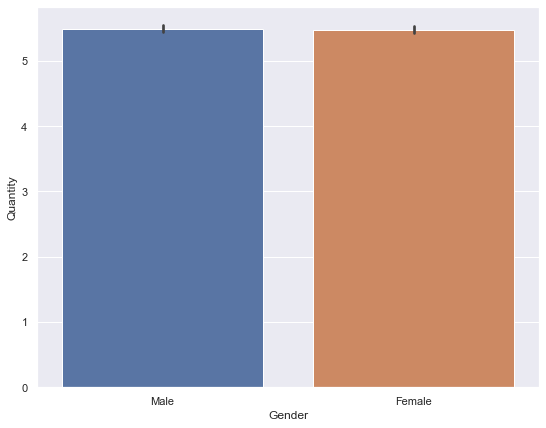

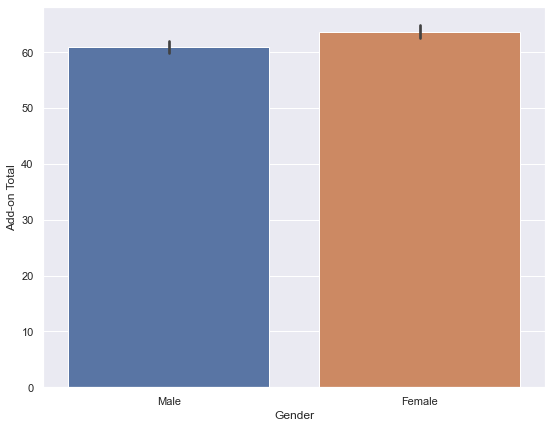

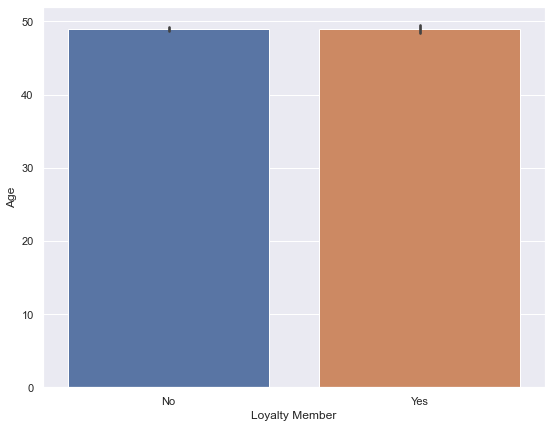

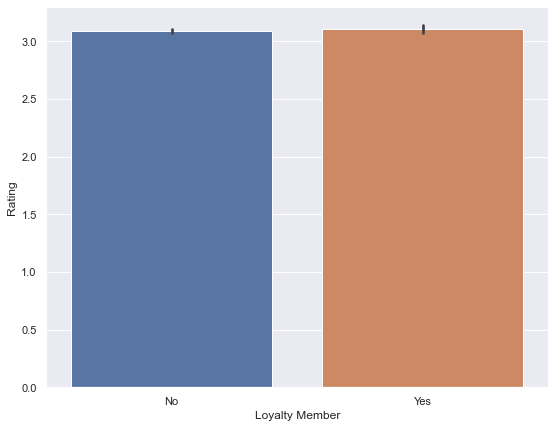

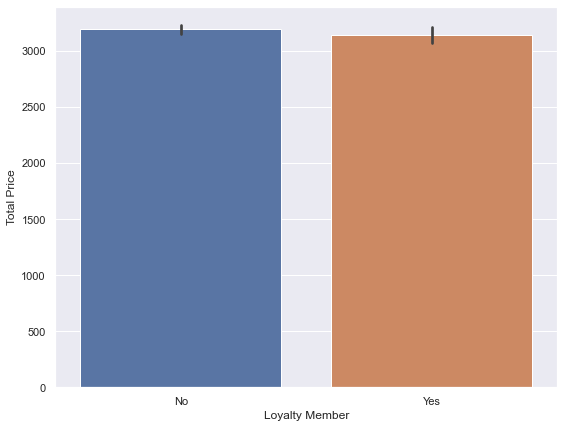

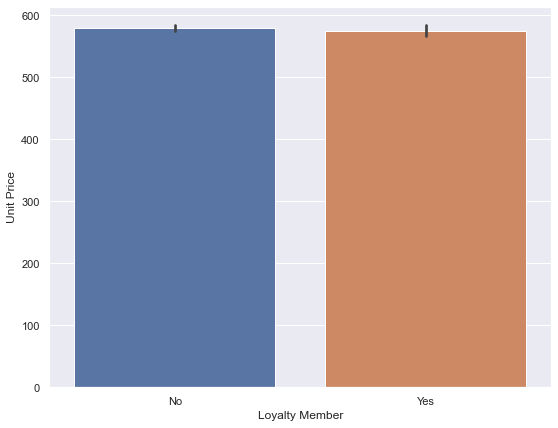

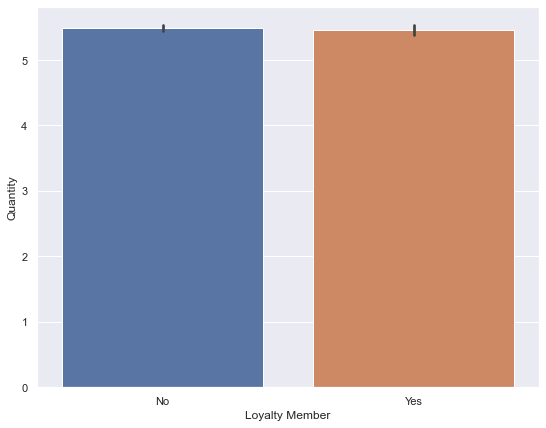

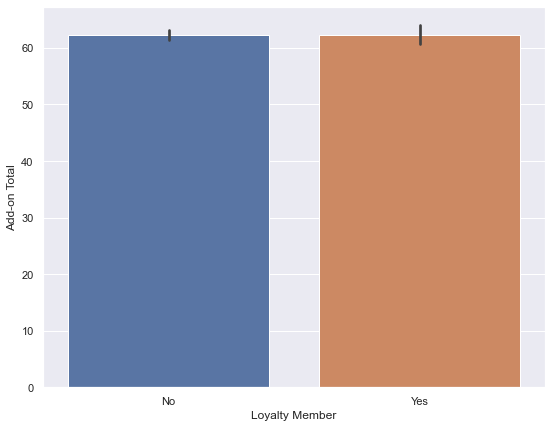

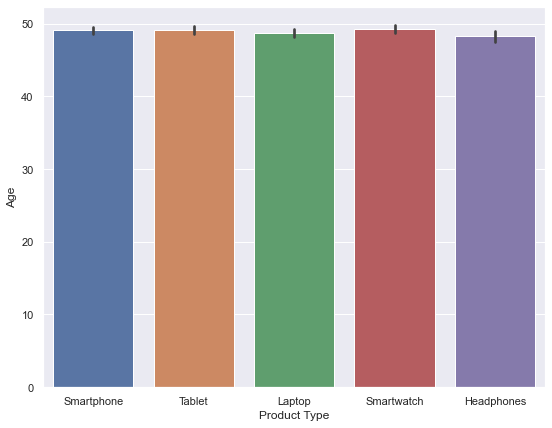

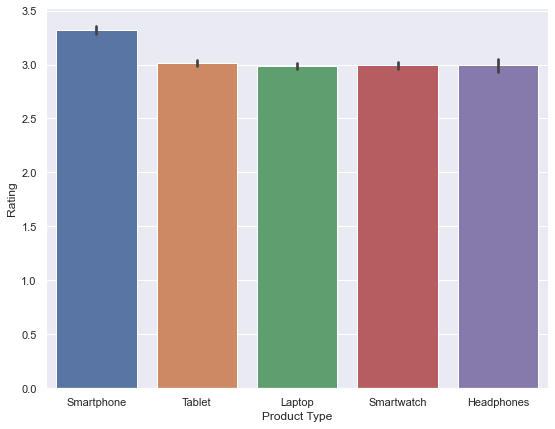

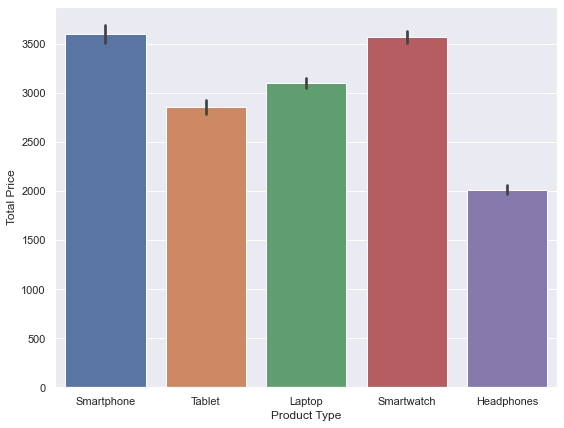

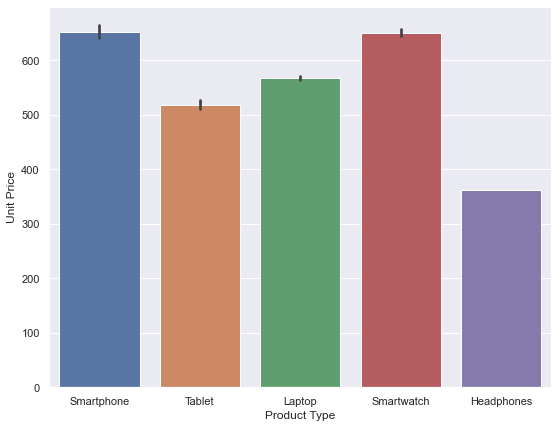

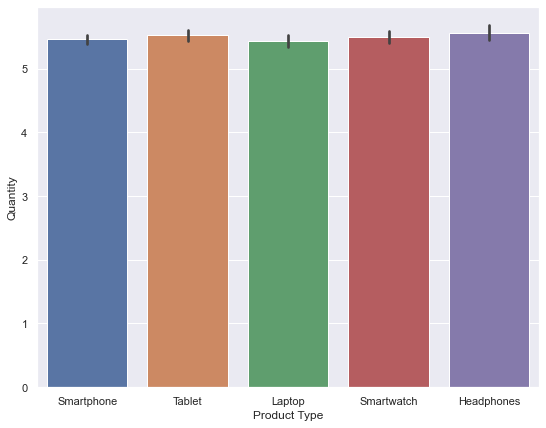

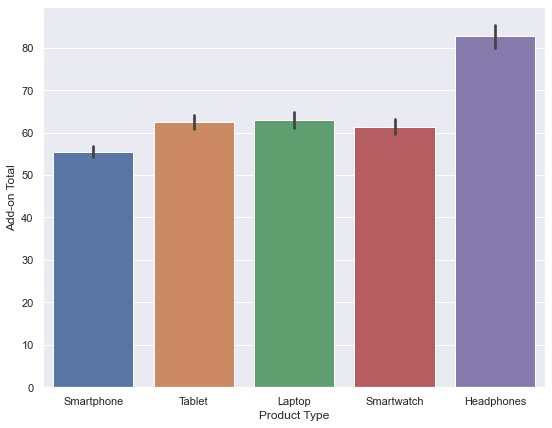

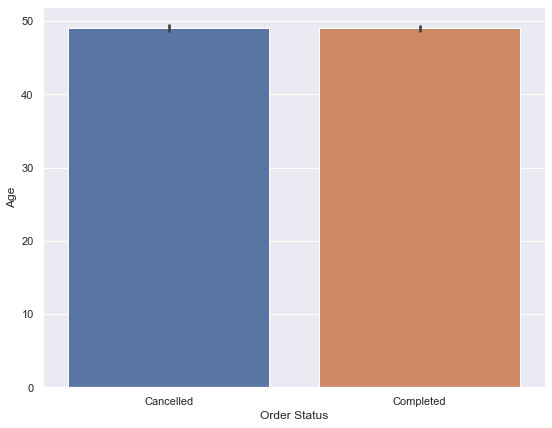

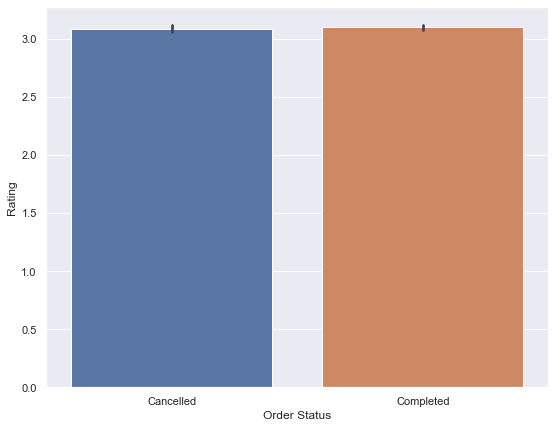

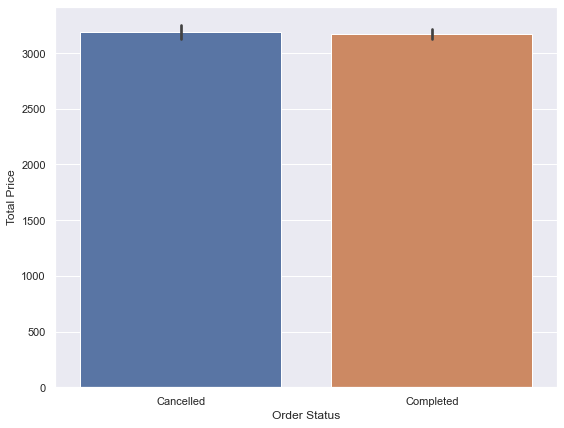

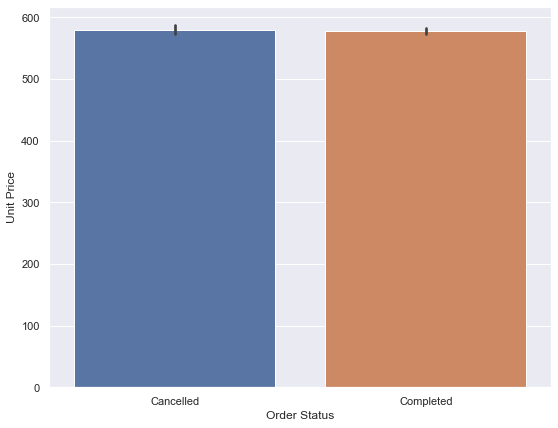

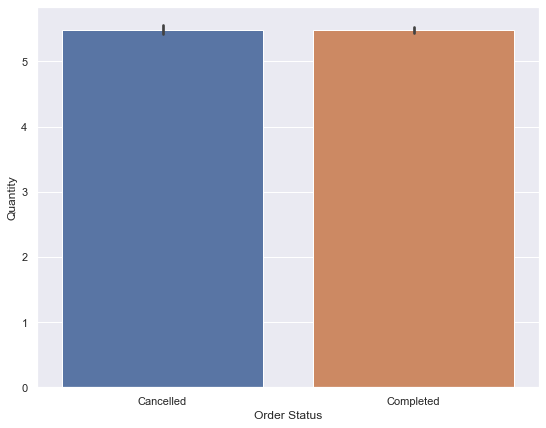

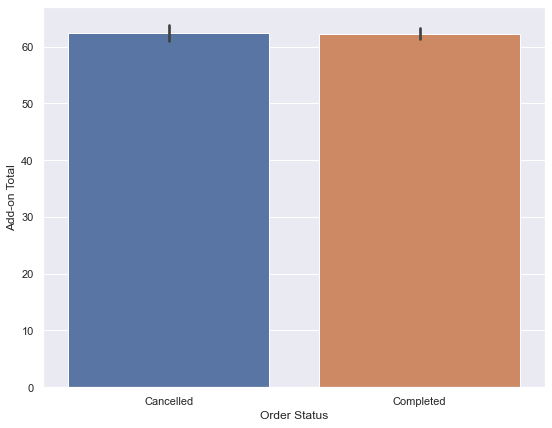

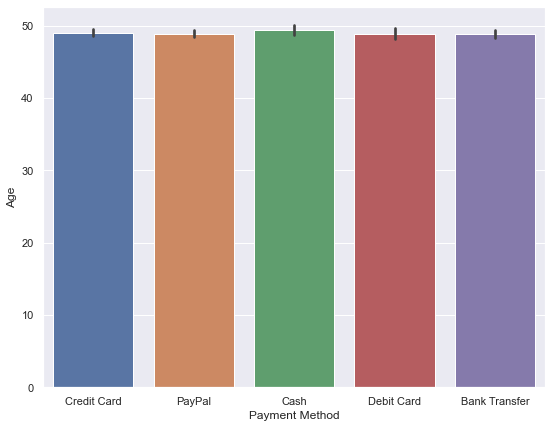

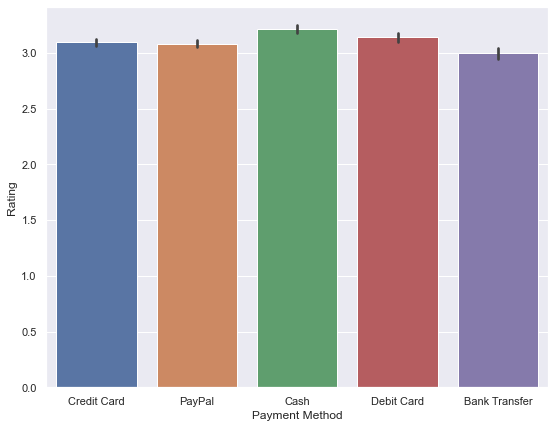

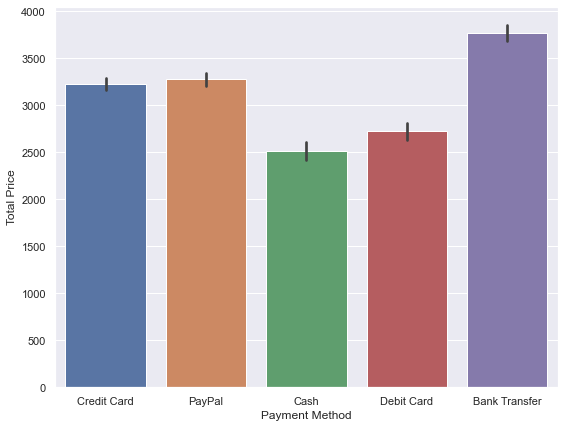

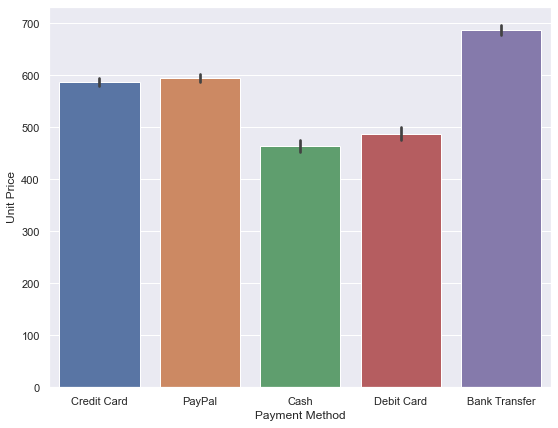

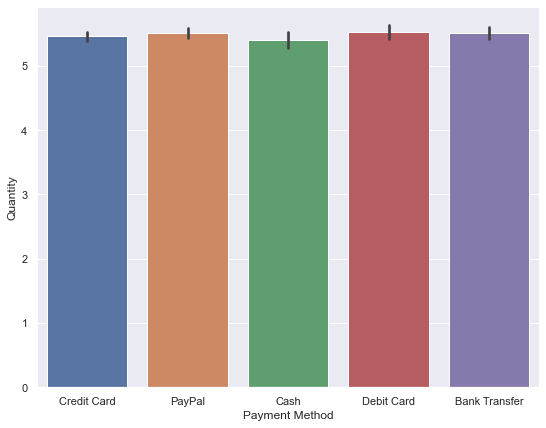

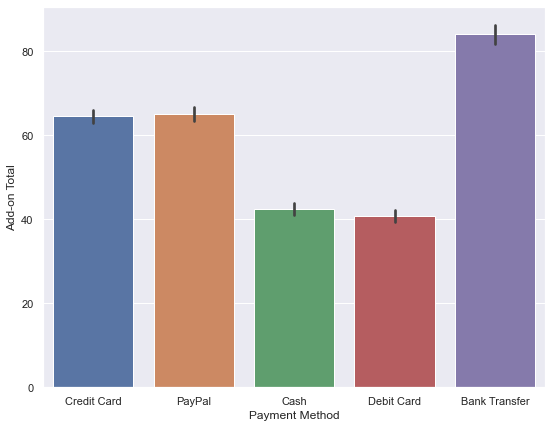

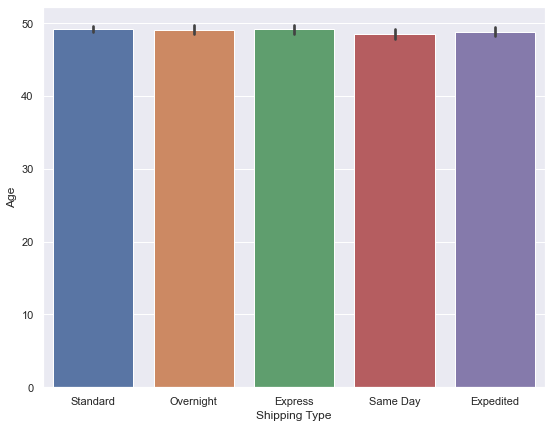

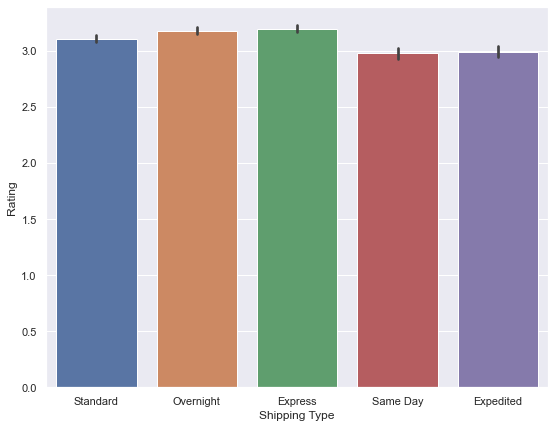

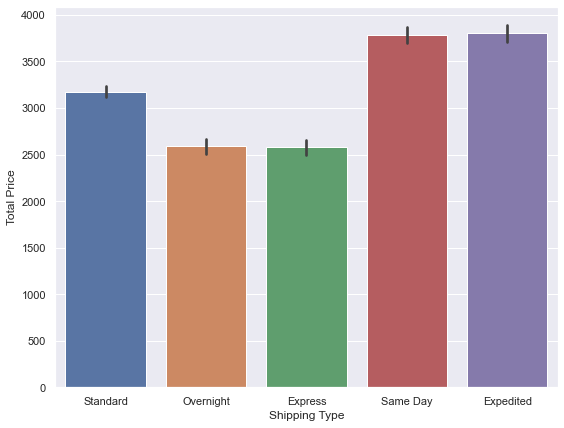

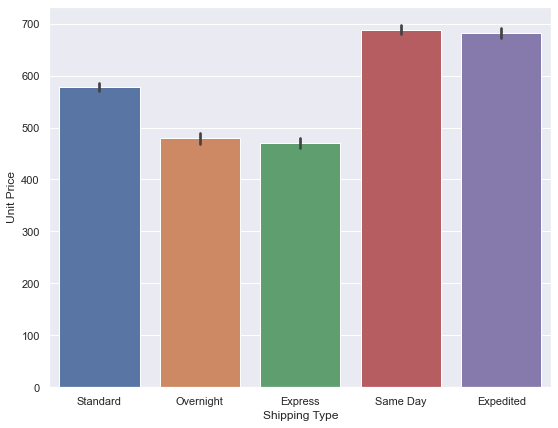

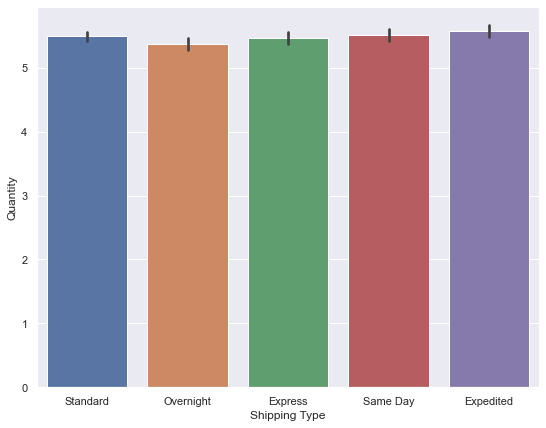

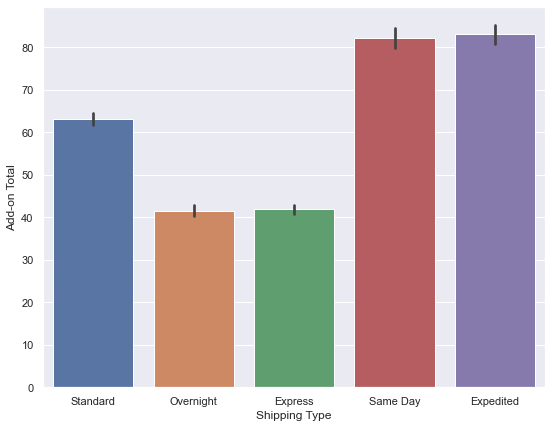

In [26]:
for i in categorical_columns:
    for j in numerical_columns:
        plt.figure(figsize = (9, 7))
        sns.barplot(data = data, x = i, y = j)
        plt.show()

# According to the bar plot graphs, the following information has been extracted from the data:
1- Among the 5 products of smartphones, tablets, laptops, smart watches and headphones, the smartphone has the highest level of customer satisfaction.

2- The highest price among these five types of goods belongs to smartphones and smart watches, and headphones have the lowest price on average. 

3- Most of the time, when headphones are purchased, more goods are purchased with it, but customers who buy a smartphone buy less goods with it.

4- Customers whose purchase amount is low, usually pay in cash, and customers whose purchase cost is high, usually use bank transfer to pay. 

5- Customers who have used bank transfer to pay their expenses have chosen more items along with their main product and this has caused the cost of their order to increase and they use bank transfer to pay.

6- Customers who used the express shipping type had the highest level of satisfaction with their purchase, and customers who used the same day and expedited shipping type for shipping their product had the lowest level of satisfaction with have had a product.

7- Customers usually use express and overnight shipping, whose purchase cost is low compared to other customers. Customers use expedited and same day shipping, whose purchase costs are higher than other customers.

8- Customers who use expedited and same day shipping for their goods, buy the most goods together with their main goods, and this is the reason why their purchase costs are higher than other customers. And therefore, customers who spend the most compared to other customers use these two types of transportation. Also, customers whose purchase amount is lower than other customers, buy fewer products along with their main product, therefore, customers who buy the least amount of products along with their main product, from two types of express and overnight shipping. have chosen to transport their product.

In [27]:
def scatter_plot(x_data, y_data, hue_data):
    plt.figure(figsize = (9, 7))
    sns.scatterplot(data = data, x = x_data, y = y_data, hue = hue_data)
    plt.show()

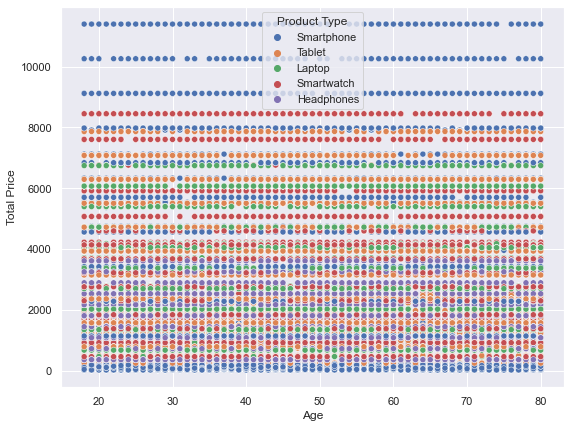

In [28]:
scatter_plot('Age', 'Total Price', 'Product Type')

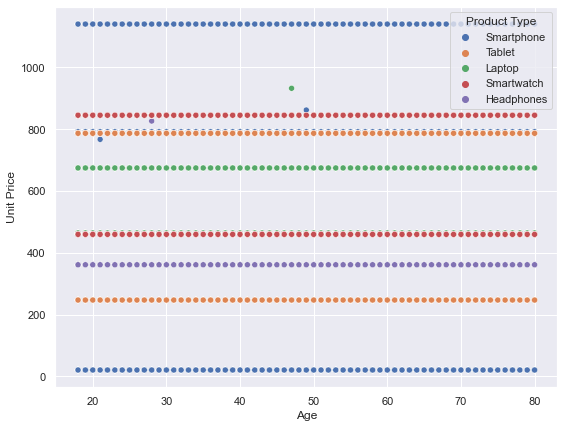

In [29]:
scatter_plot('Age', 'Unit Price', 'Product Type')

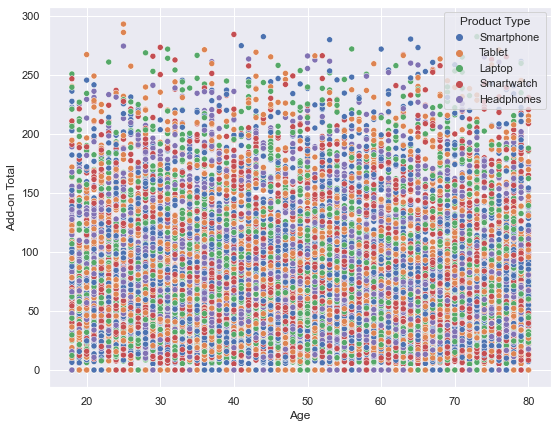

In [30]:
scatter_plot('Age', 'Add-on Total', 'Product Type')

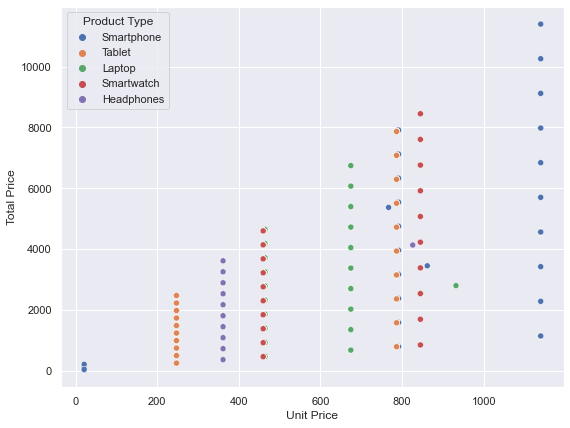

In [31]:
scatter_plot('Unit Price', 'Total Price', 'Product Type')

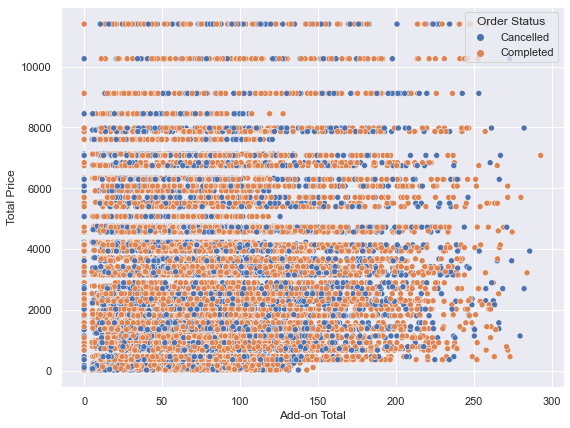

In [32]:
scatter_plot('Add-on Total', 'Total Price', 'Order Status')

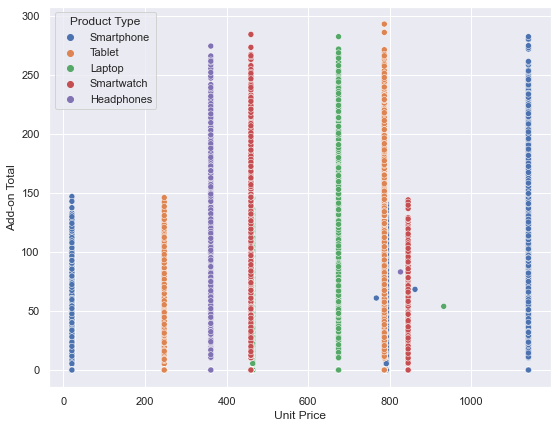

In [33]:
scatter_plot('Unit Price', 'Add-on Total', 'Product Type')

# According to the above scatter plot diagrams, the following information is extracted:
1- The highest cost of a product is related to smartphones. 

2- Age does not affect the amount of money that each customer spends to buy goods. 

3- As the price of a single product increases, the total cost that a customer pays also increases.

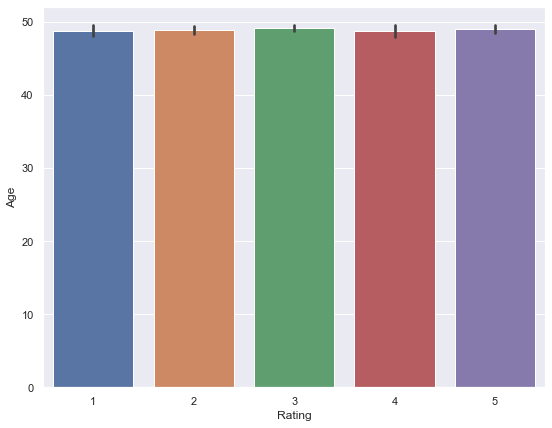

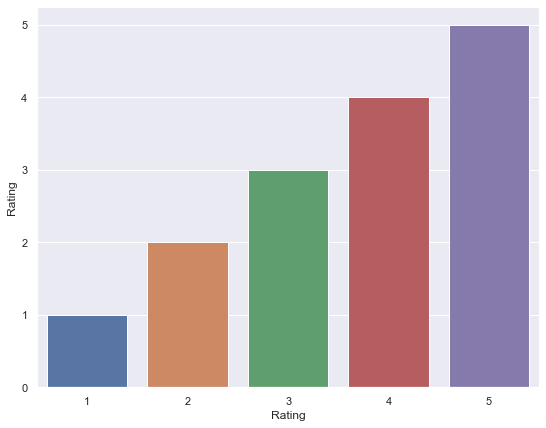

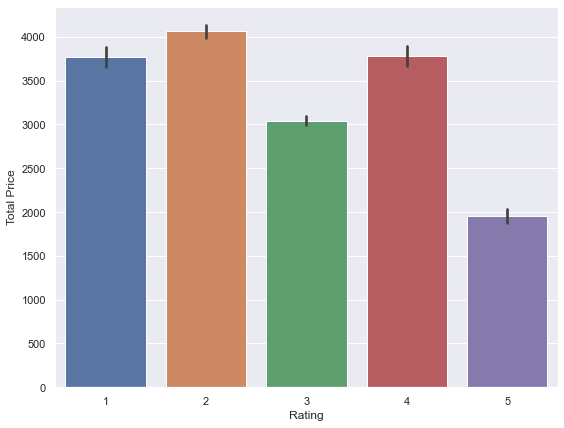

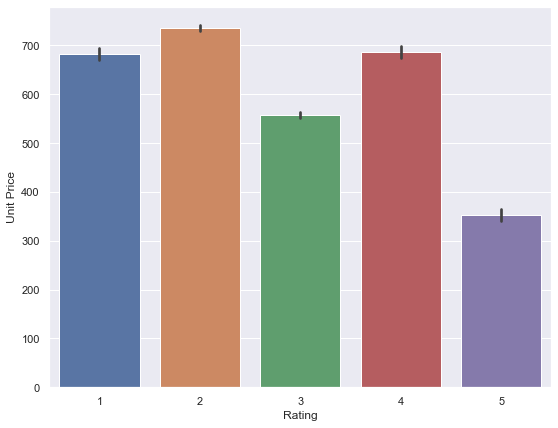

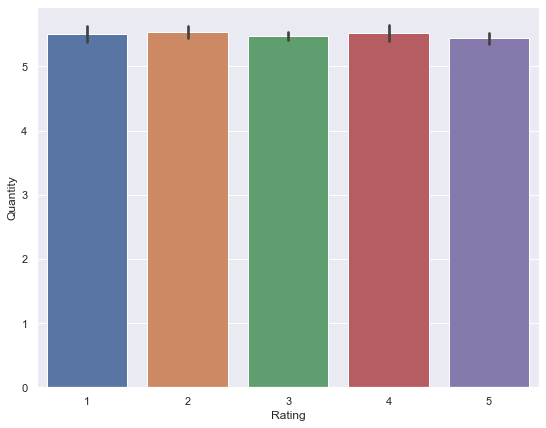

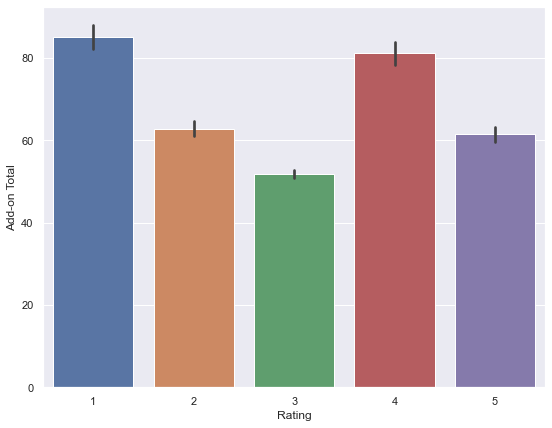

In [34]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.barplot(data = data, x = 'Rating', y = column)
    plt.show()

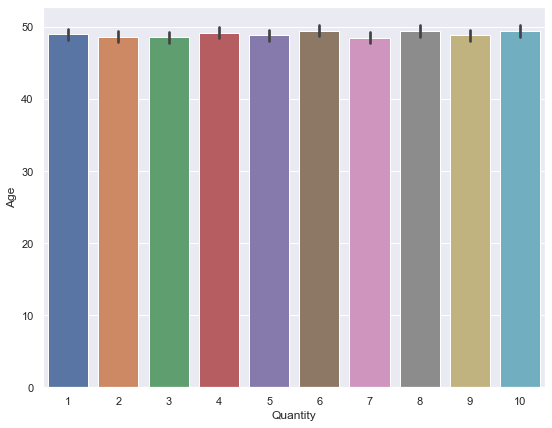

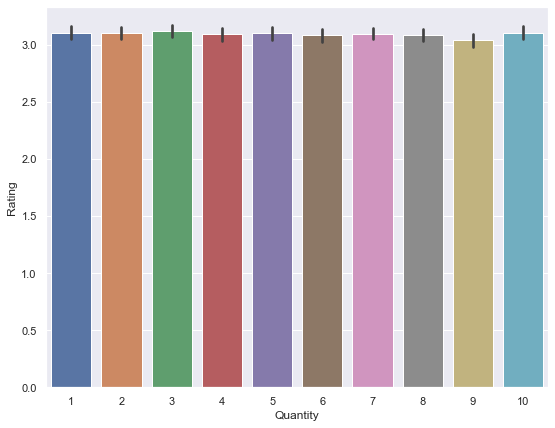

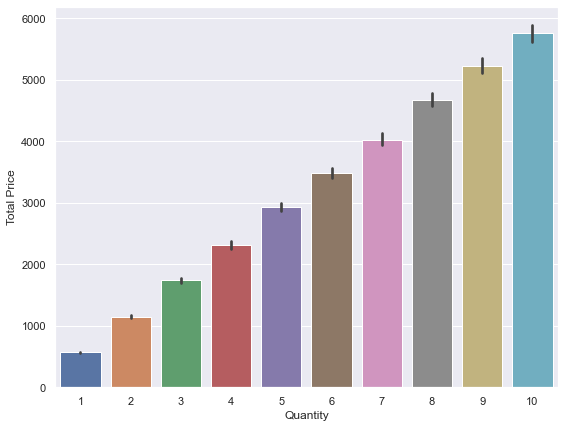

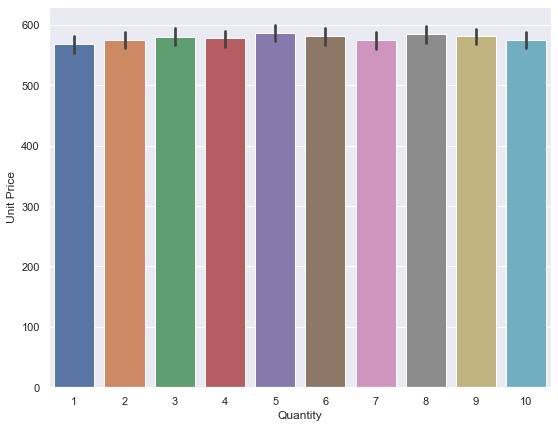

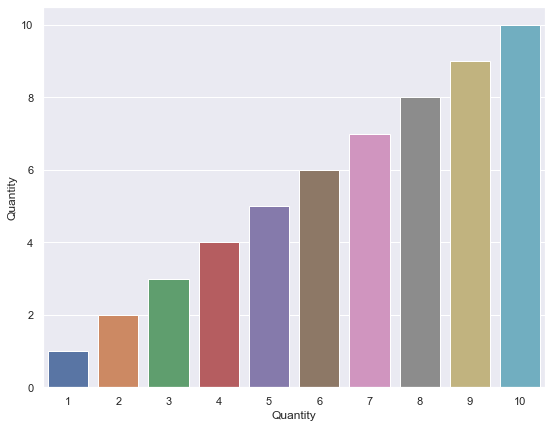

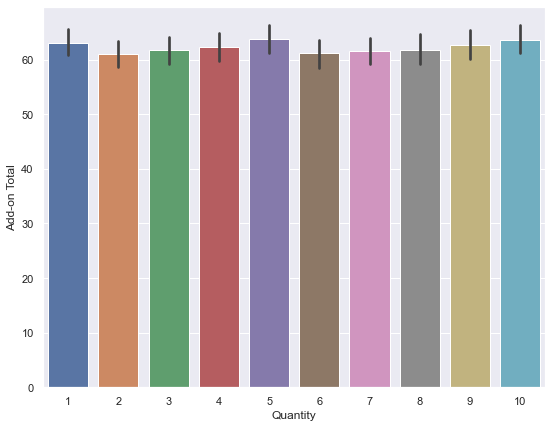

In [35]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.barplot(data = data, x = 'Quantity', y = column)
    plt.show()

# According to the bar plot graphs drawn above, the following information is extracted:
1- On average, customers who paid more for their purchase had a higher level of dissatisfaction.

2- The more customers pay for a single product, the more dissatisfied they will be. 

3- Specifically, the more products a customer has purchased, the higher the final cost he must pay.

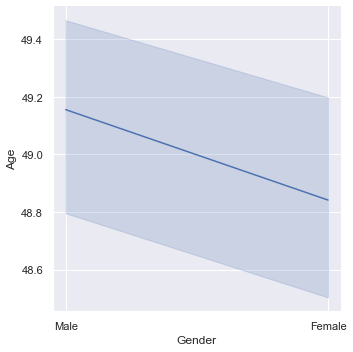

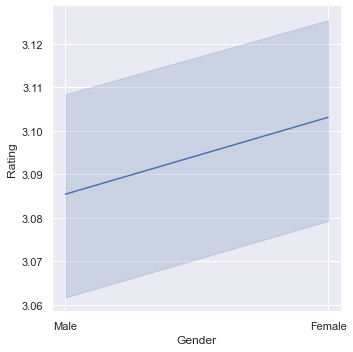

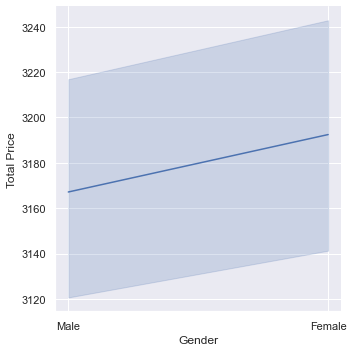

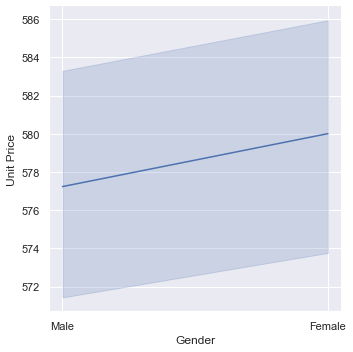

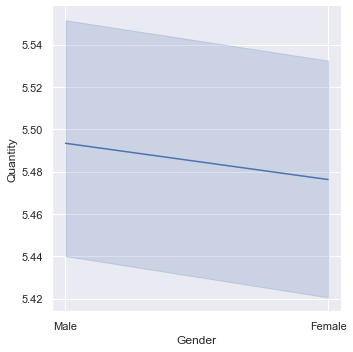

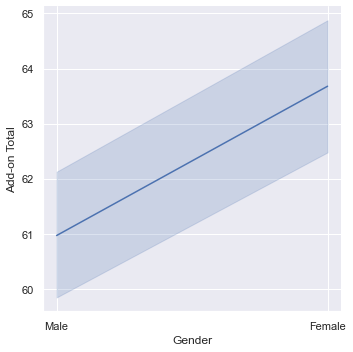

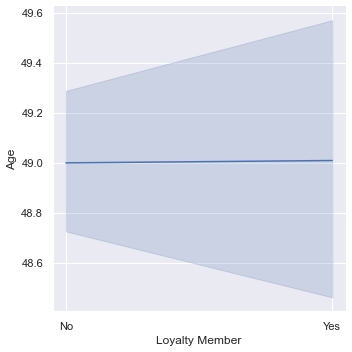

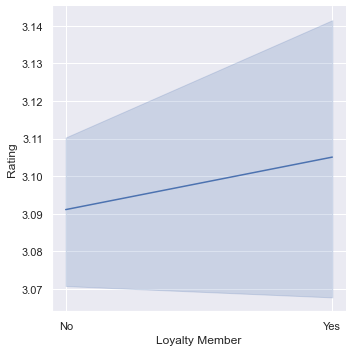

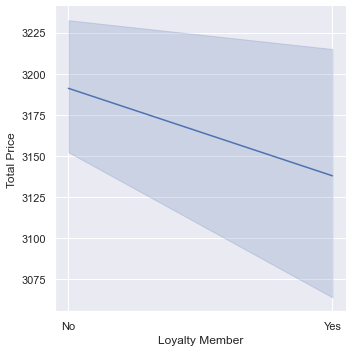

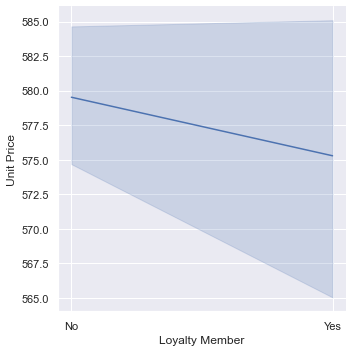

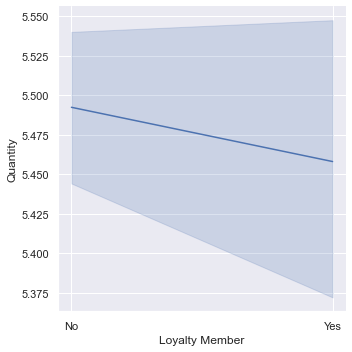

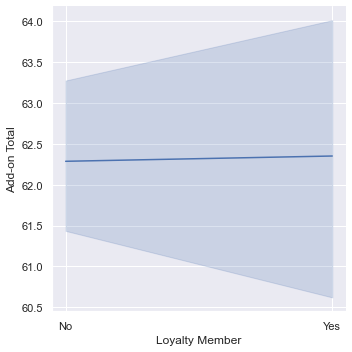

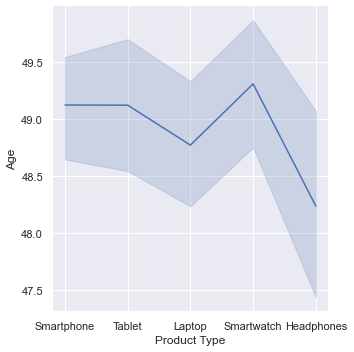

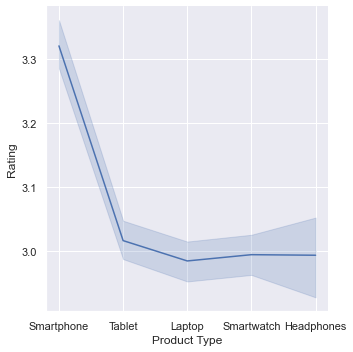

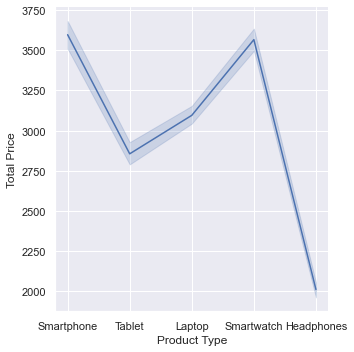

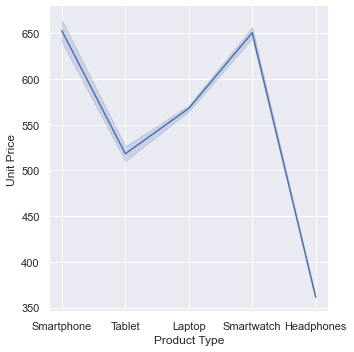

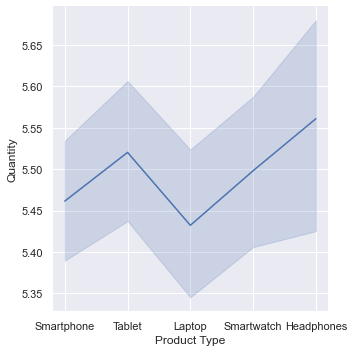

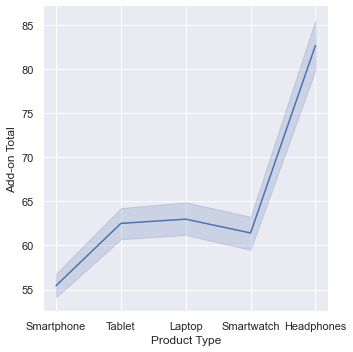

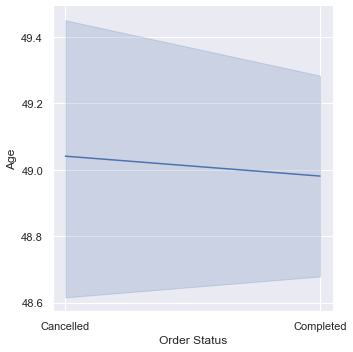

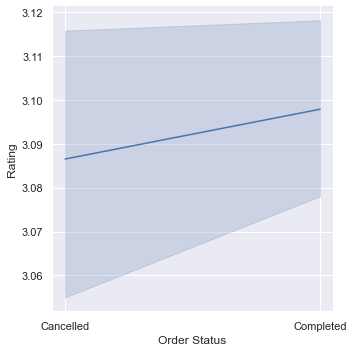

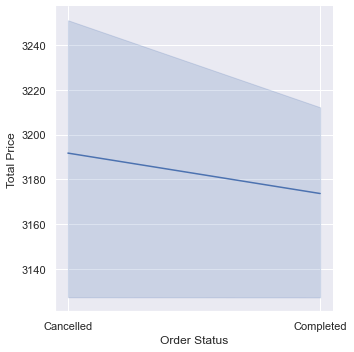

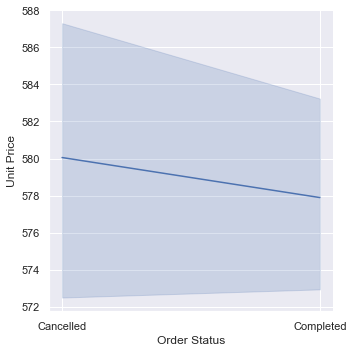

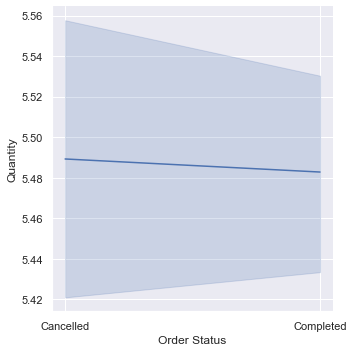

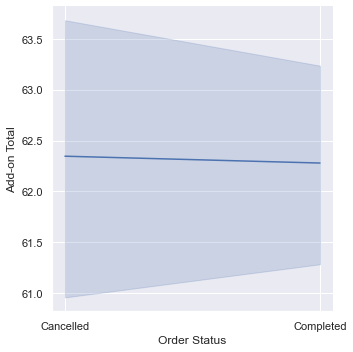

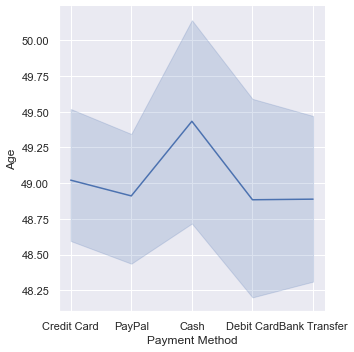

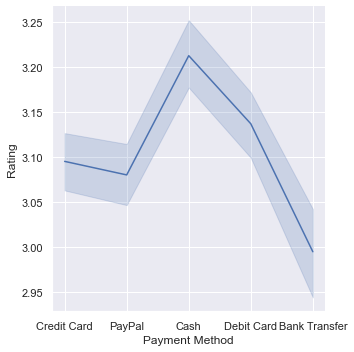

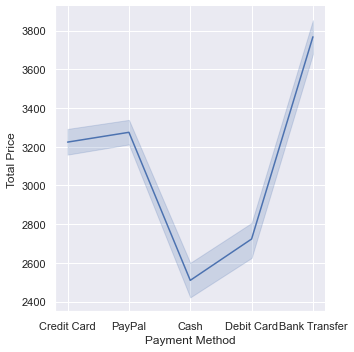

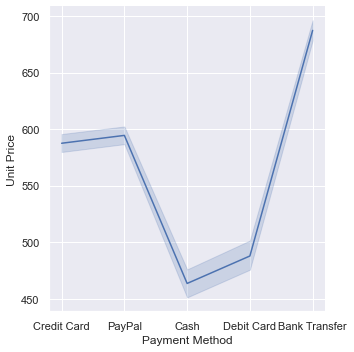

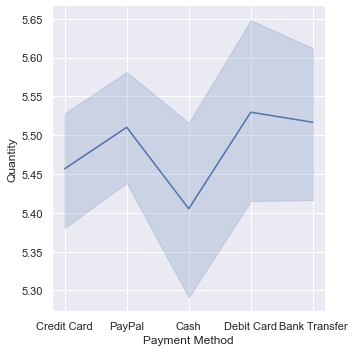

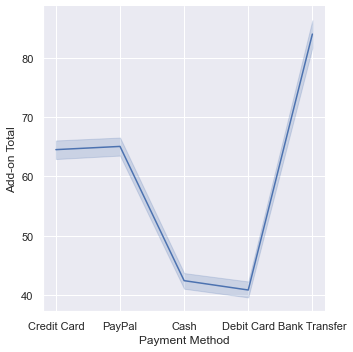

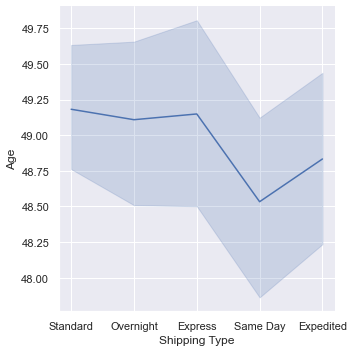

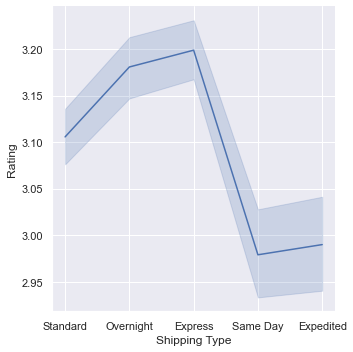

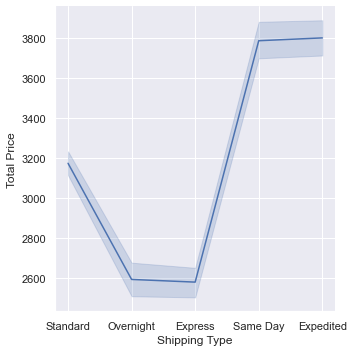

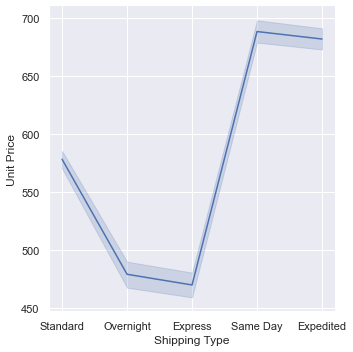

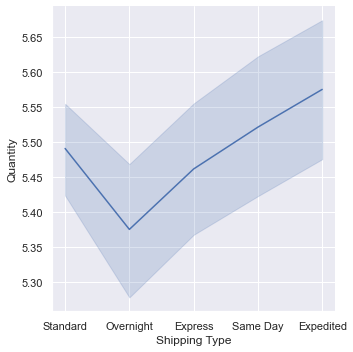

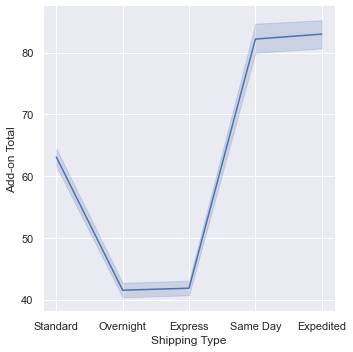

In [36]:
for i in categorical_columns:
    for j in numerical_columns:
        sns.relplot(data = data, x = i, y = j, kind = 'line')

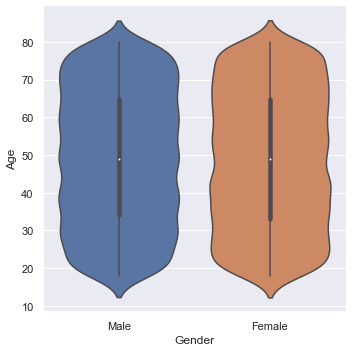

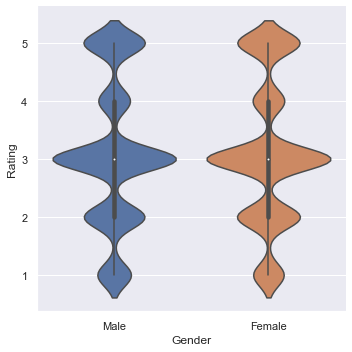

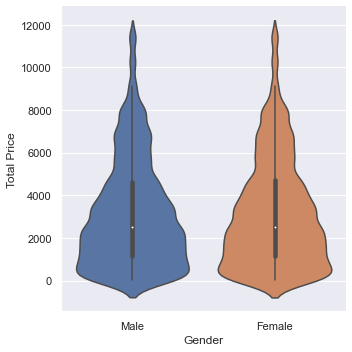

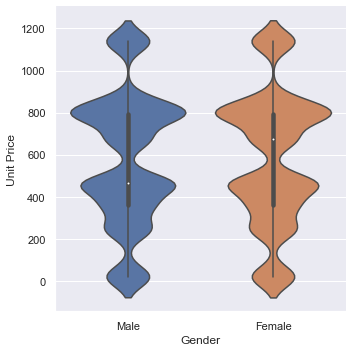

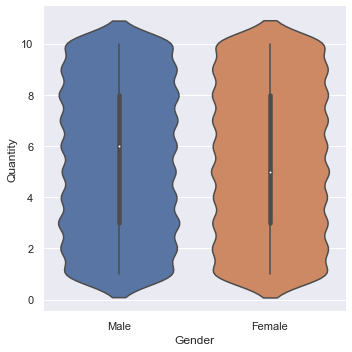

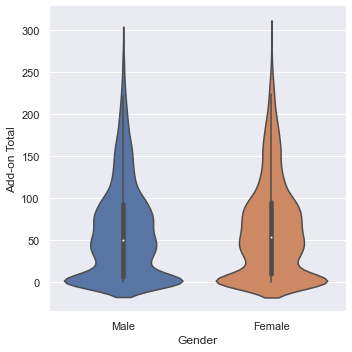

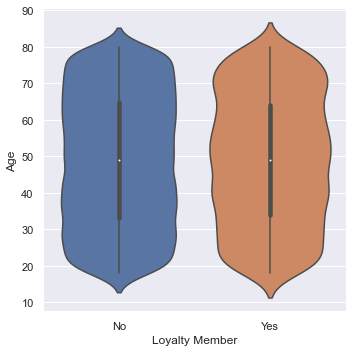

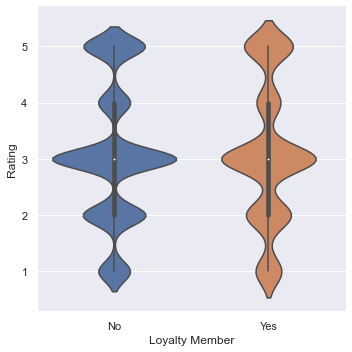

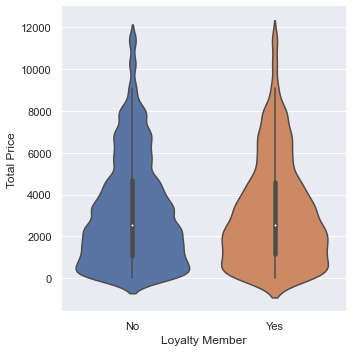

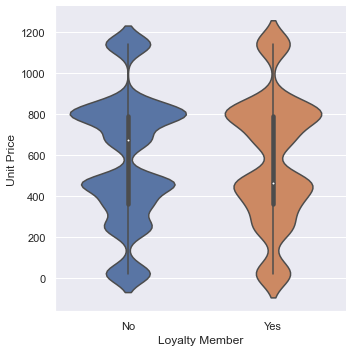

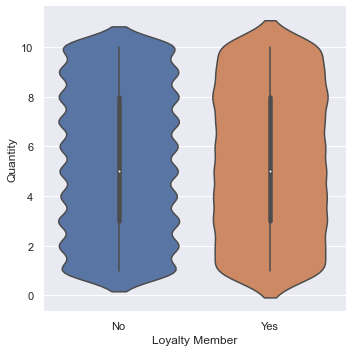

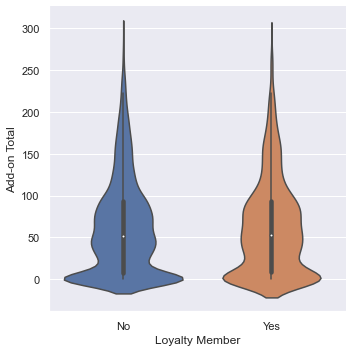

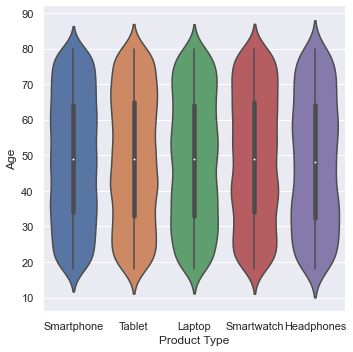

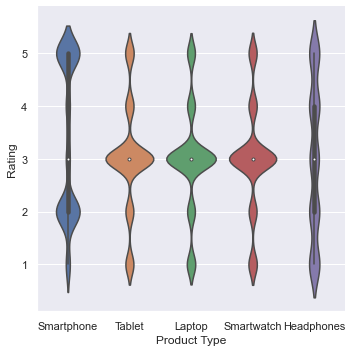

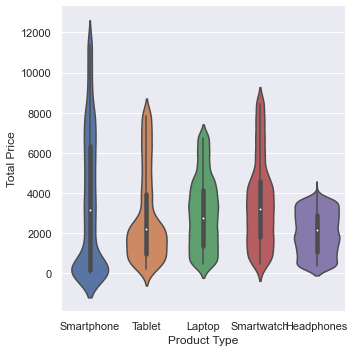

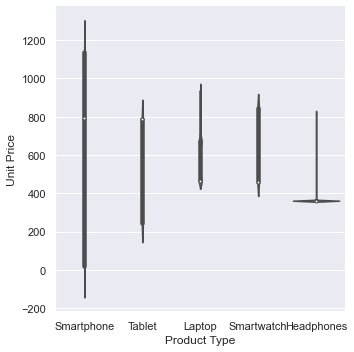

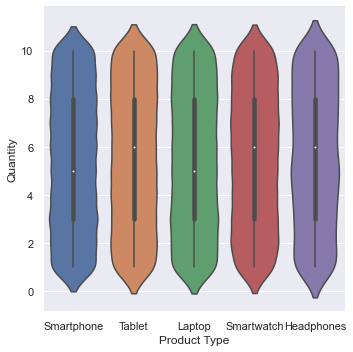

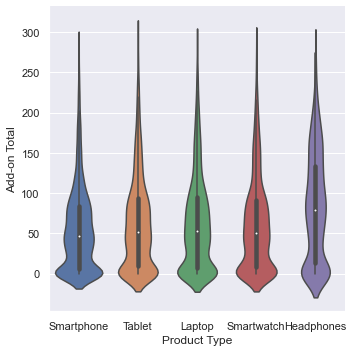

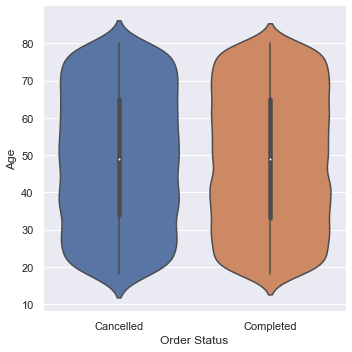

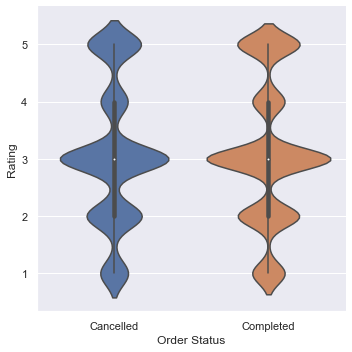

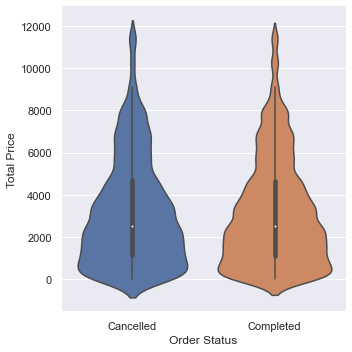

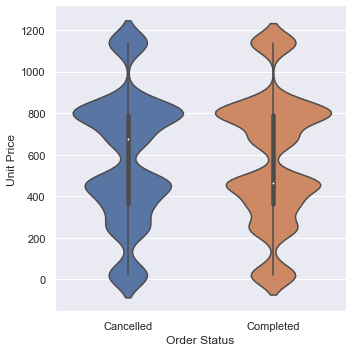

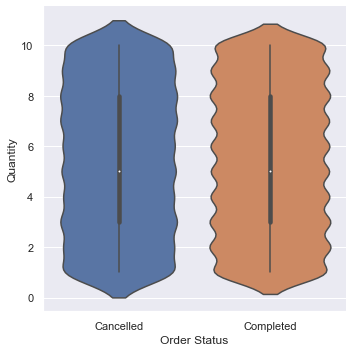

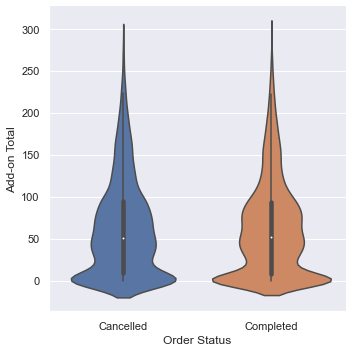

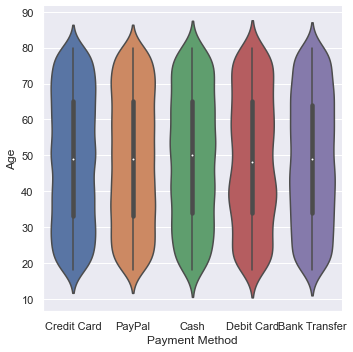

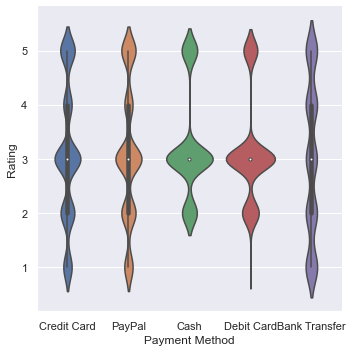

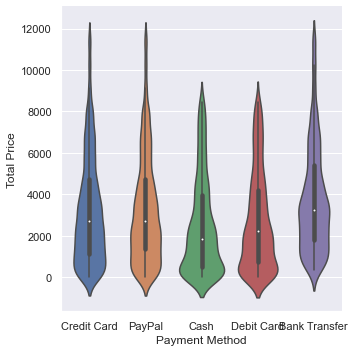

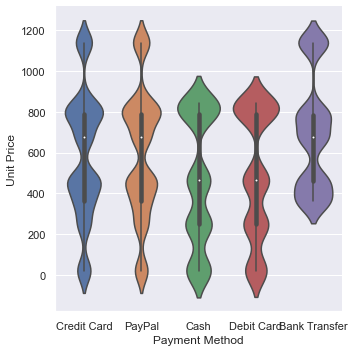

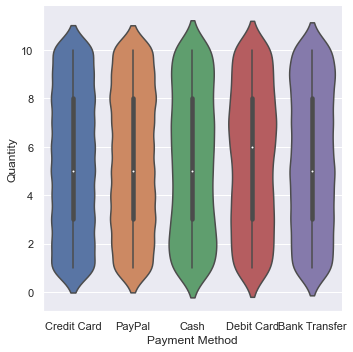

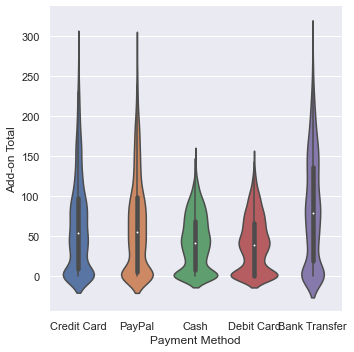

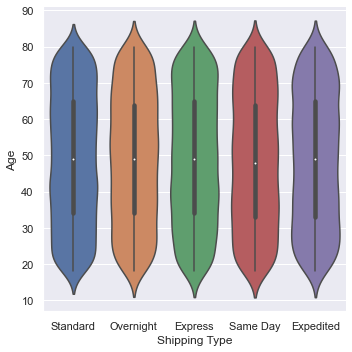

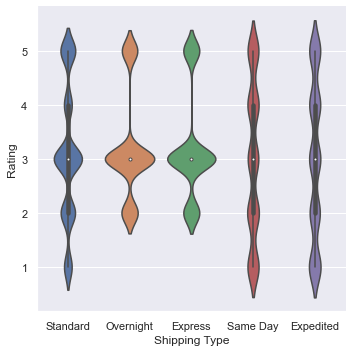

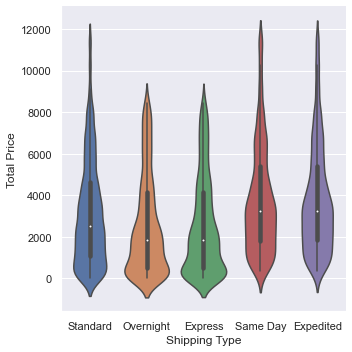

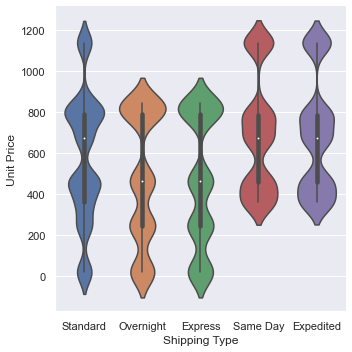

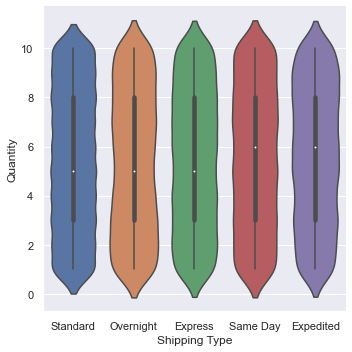

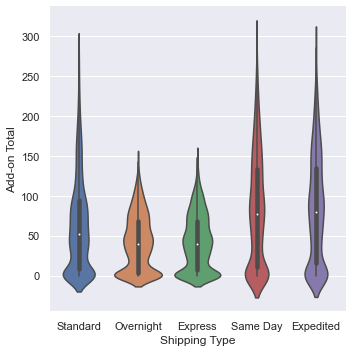

In [37]:
for i in categorical_columns:
    for j in numerical_columns:
        sns.catplot(data = data, x = i, y = j, kind = 'violin')

In [38]:
cols1 = ['Age', 'Total Price', 'Unit Price', 'Add-on Total']

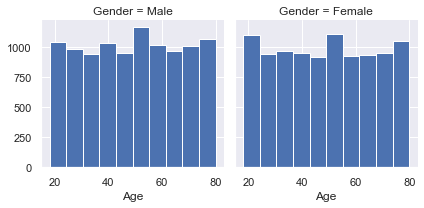

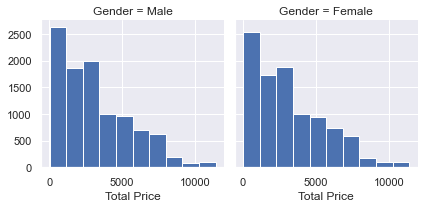

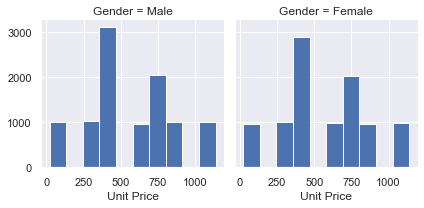

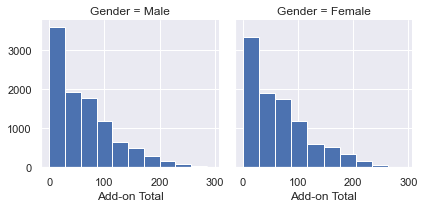

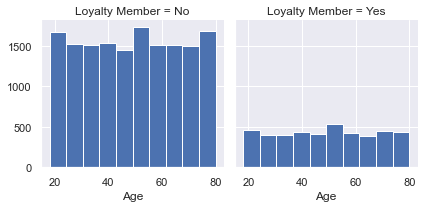

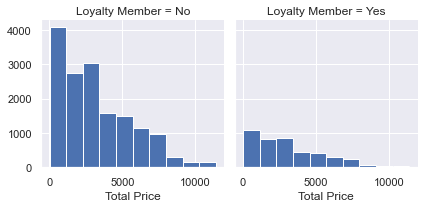

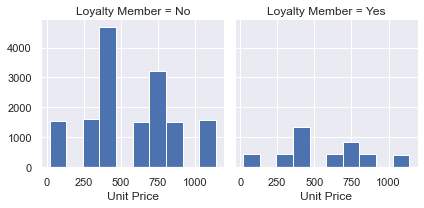

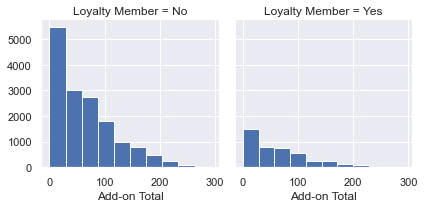

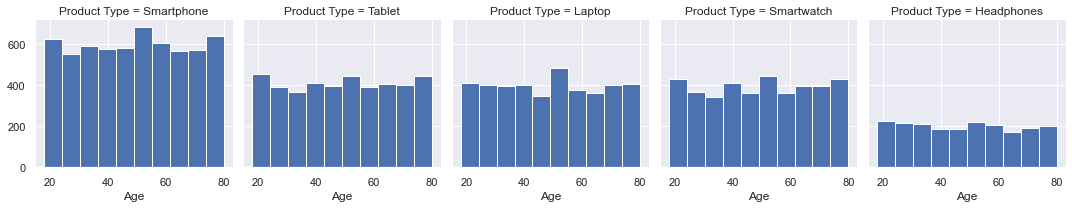

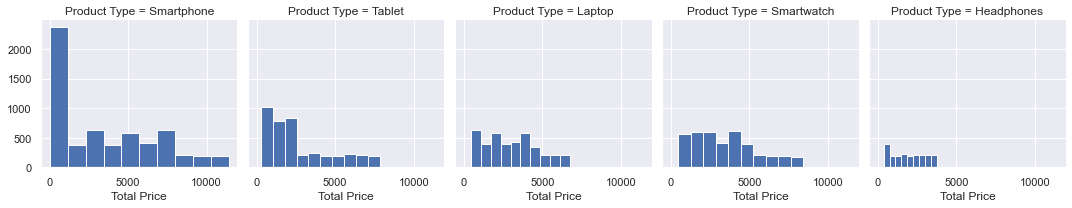

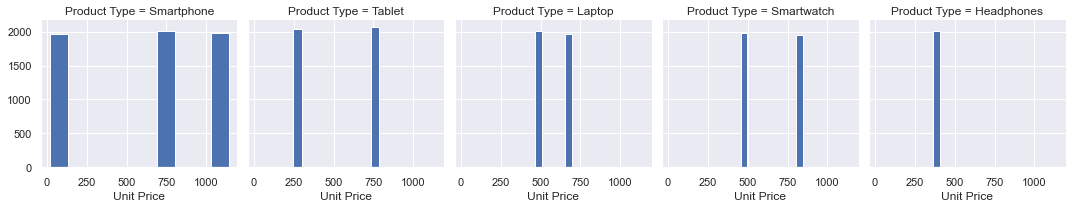

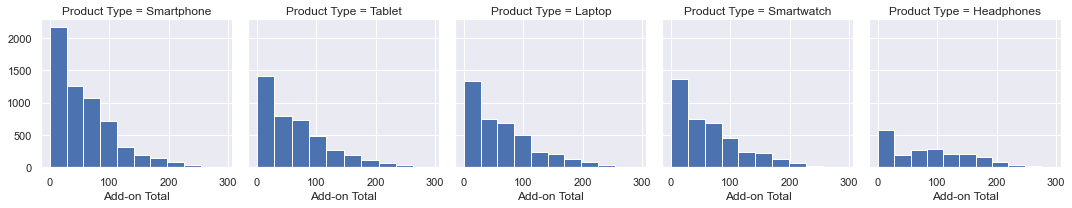

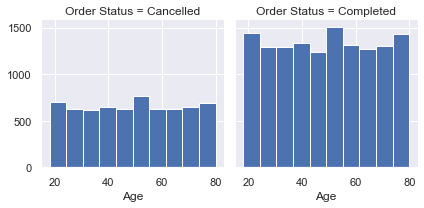

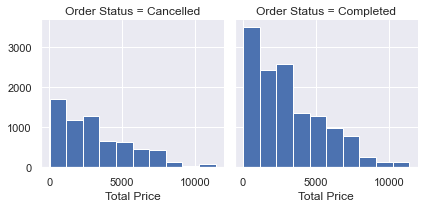

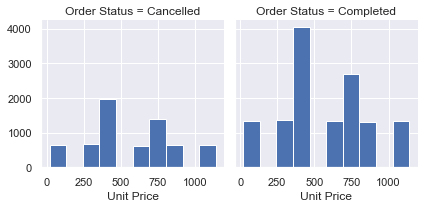

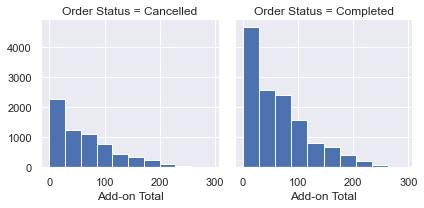

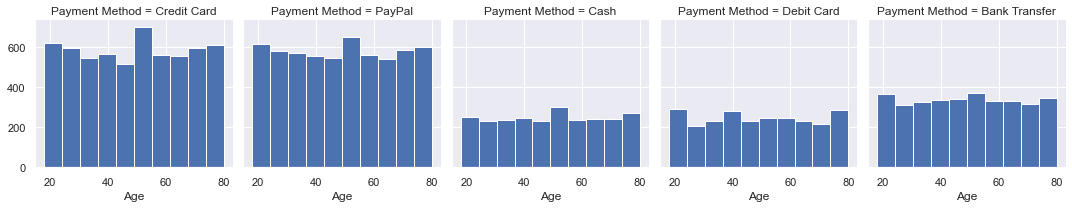

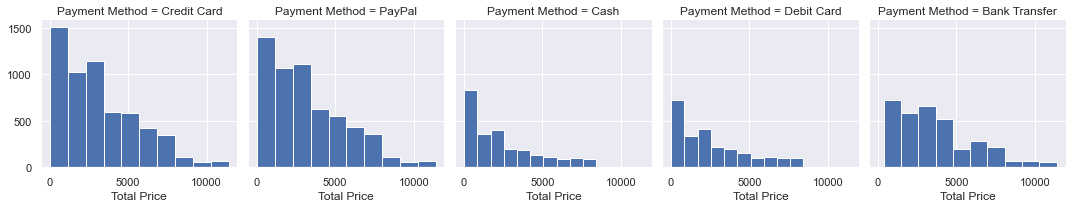

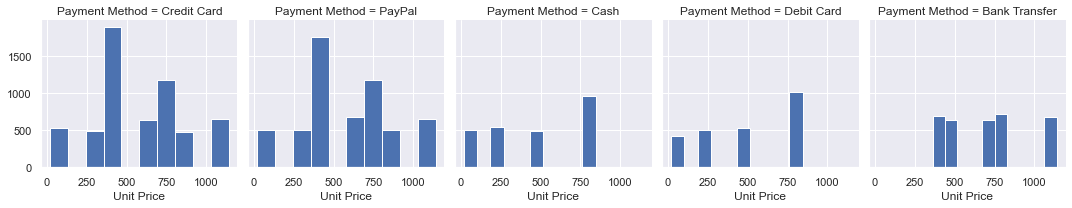

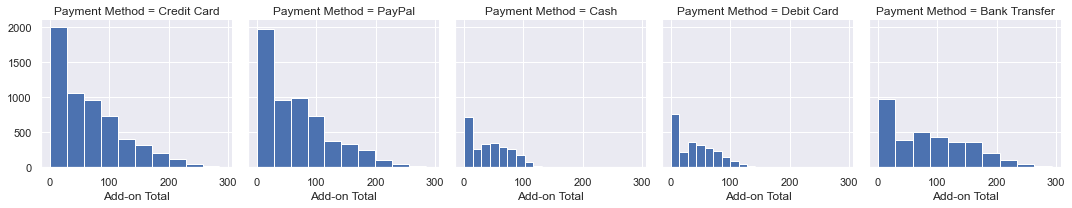

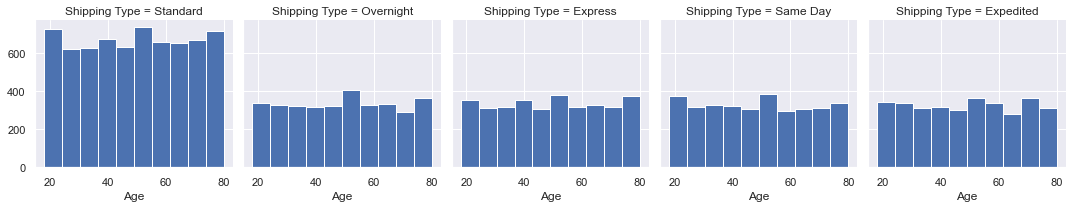

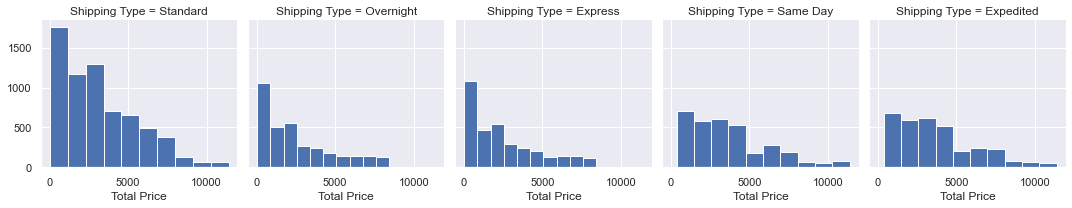

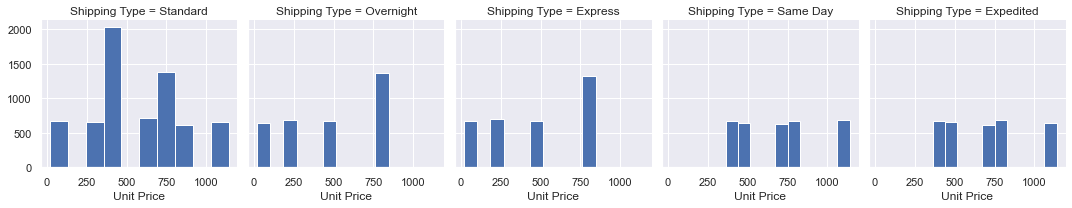

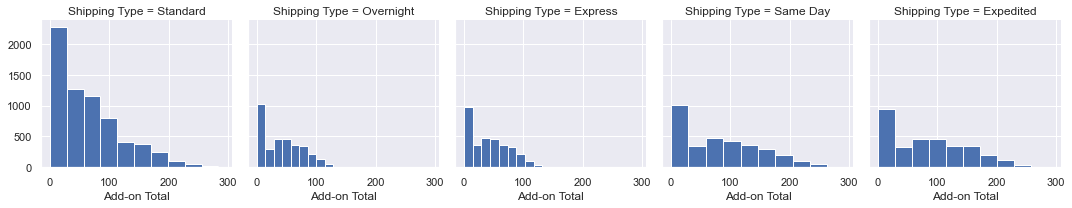

In [39]:
for i in categorical_columns:
    for j in cols1:
        b = sns.FacetGrid(data = data, col = i)
        b.map(plt.hist, j)
        plt.show()

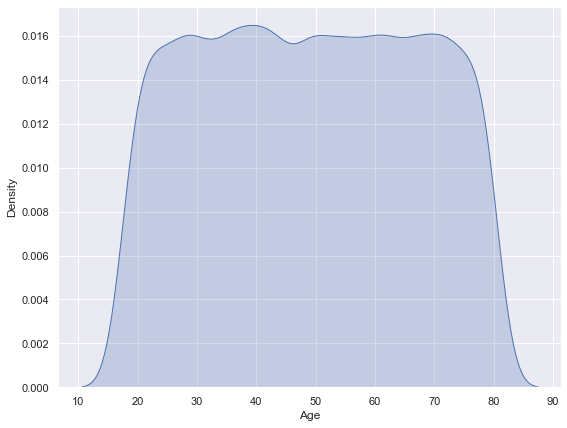

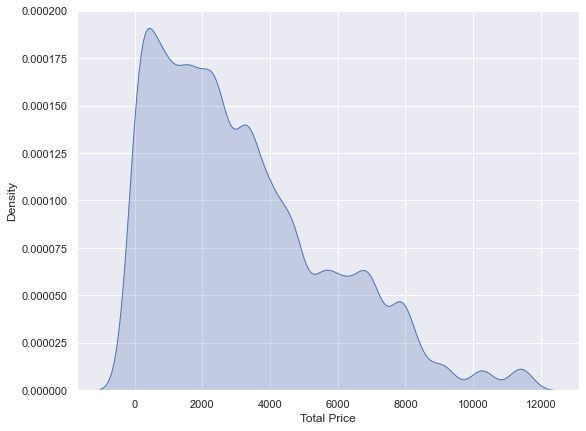

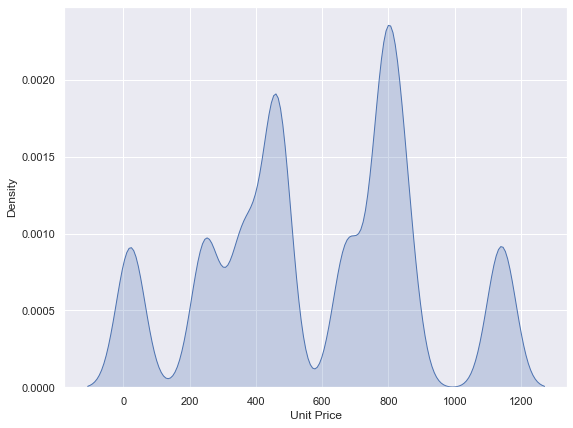

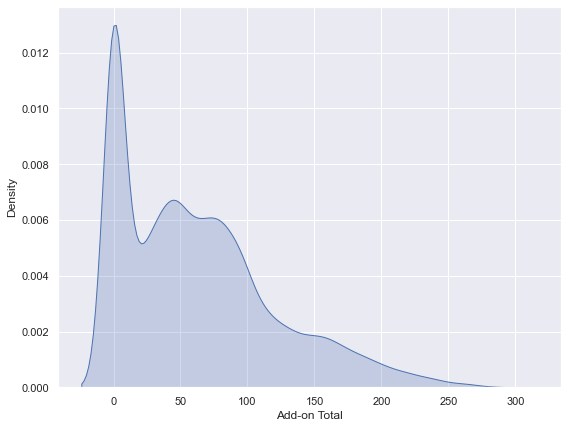

In [40]:
for column in cols1:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data[column], shade = True, legend = False)
    plt.show()

In [41]:
data.shape

(19982, 12)

In [42]:
q1_1 = data['Age'].quantile(0.99)
q1_2 = data['Age'].quantile(0.01)
data = data[data['Age'] < q1_1]
data = data[data['Age'] > q1_2]

In [43]:
data.shape

(19393, 12)

In [44]:
q2_1 = data['Total Price'].quantile(0.99)
q2_2 = data['Total Price'].quantile(0.01)
data = data[data['Total Price'] < q2_1]
data = data[data['Total Price'] > q2_2]

In [45]:
data.shape

(18814, 12)

In [46]:
q3_1 = data['Unit Price'].quantile(0.99)
q3_2 = data['Unit Price'].quantile(0.01)
data = data[data['Unit Price'] < q3_1]
data = data[data['Unit Price'] > q3_2]

In [47]:
data.shape

(15566, 12)

In [48]:
q4_1 = data['Add-on Total'].quantile(0.99)
q4_2 = data['Add-on Total'].quantile(0.01)
data = data[data['Add-on Total'] < q4_1]
data = data[data['Add-on Total'] > q4_2]

In [49]:
data.shape

(11642, 12)

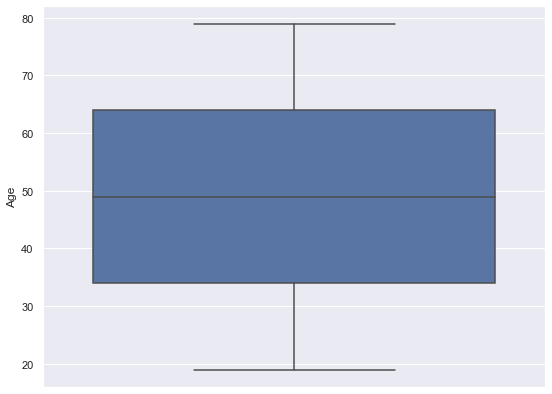

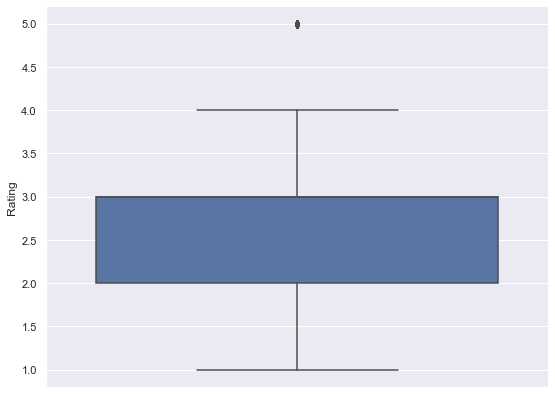

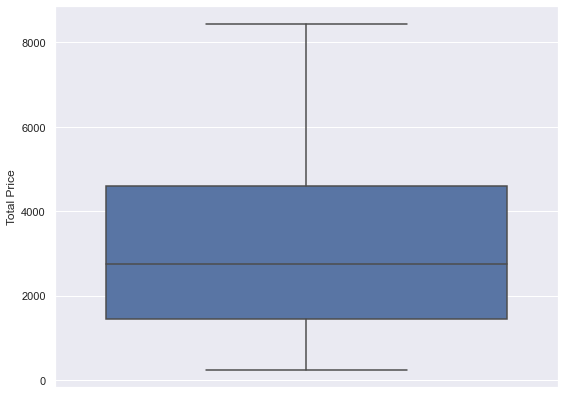

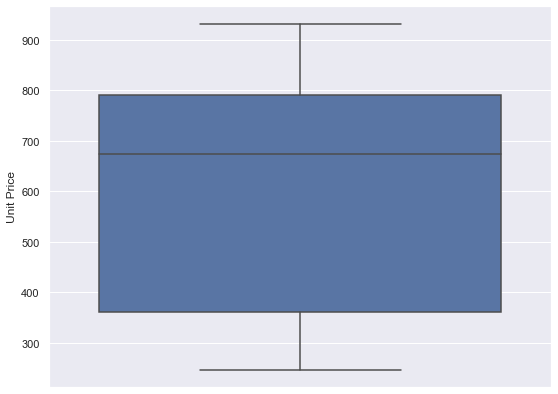

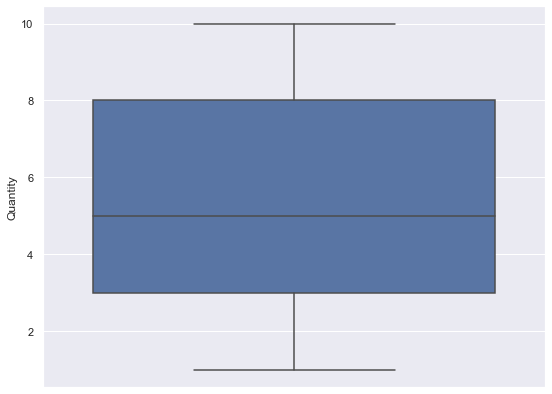

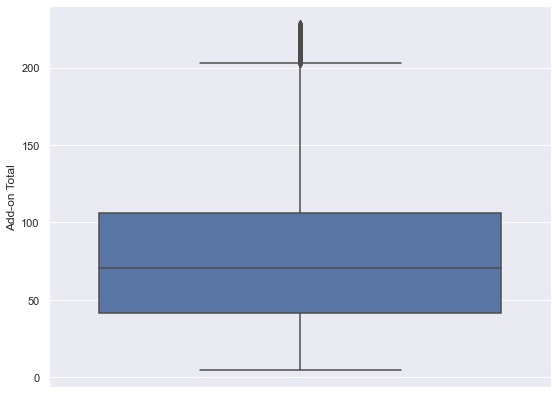

In [50]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.boxplot(data = data, y = column)
    plt.show()

In [51]:
data[data['Rating'] == 5].shape

(1169, 12)

In [52]:
data = data[data['Rating'] != 5]

In [53]:
data.shape

(10473, 12)

In [54]:
data[data['Add-on Total'] > 200].shape

(215, 12)

In [55]:
data = data[data['Add-on Total'] < 200]

In [56]:
data.shape

(10258, 12)

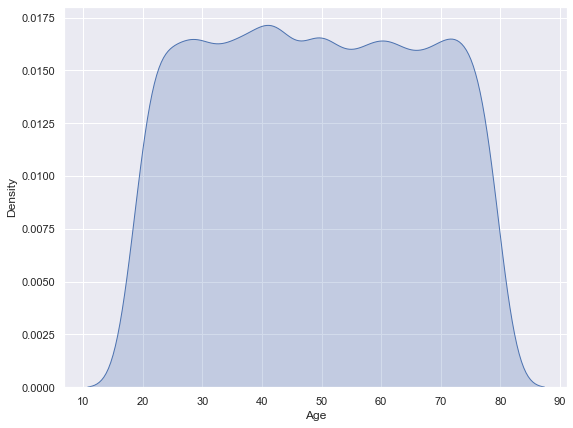

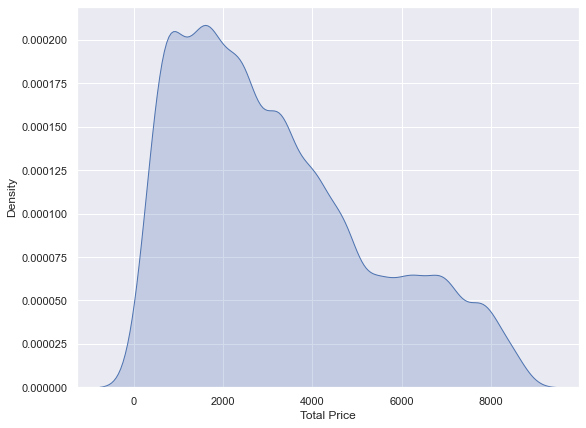

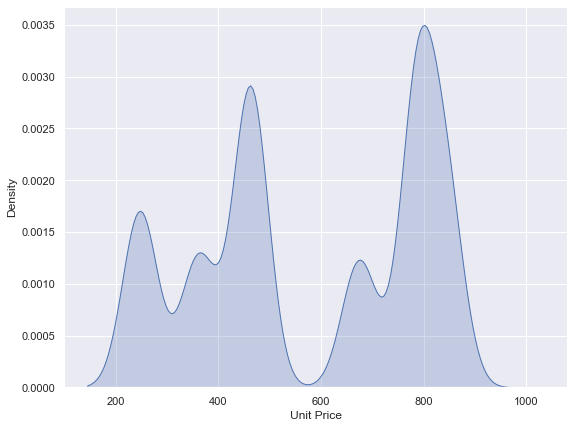

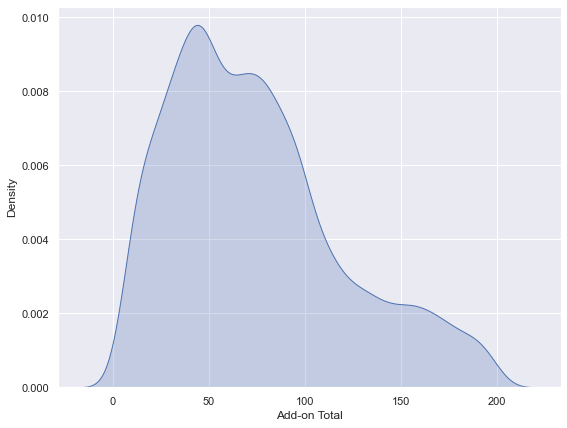

In [57]:
for column in cols1:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data[column], shade = True, legend = False)
    plt.show()

In [58]:
x1 = data[['Age', 'Total Price']]

In [59]:
data['Total Price'].min()

247.03

In [60]:
data['Total Price'].max()

8448.3

In [61]:
scaler = MinMaxScaler(feature_range = (data['Total Price'].min(), data['Total Price'].max()))

In [62]:
x1['Age'] = scaler.fit_transform(x1[['Age']])

In [63]:
x1.head()

Age  Total Price
0  4894.416333      5538.33
1  4894.416333       741.09
3  3254.162333      3164.76
7  1067.157000      4175.64
8   930.469167      5538.33

In [64]:
inertia = []
sse = []
for i in range(2, 11):
    model_init = KMeans(n_clusters = i, init = 'k-means++', n_init = 10)
    model_init.fit(x1)
    inertia.append(model_init.inertia_)
    sse.append(silhouette_score(x1, model_init.labels_))

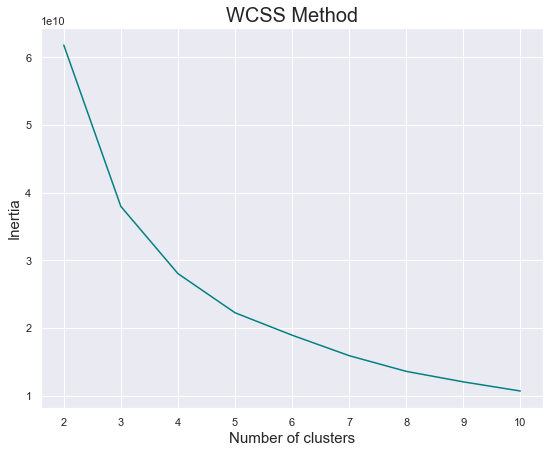

In [65]:
plt.figure(figsize = (9, 7))
plt.plot(range(2, 11), inertia, color = 'teal')
plt.title('WCSS Method', fontsize = 20)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Inertia', fontsize = 15)
plt.show()

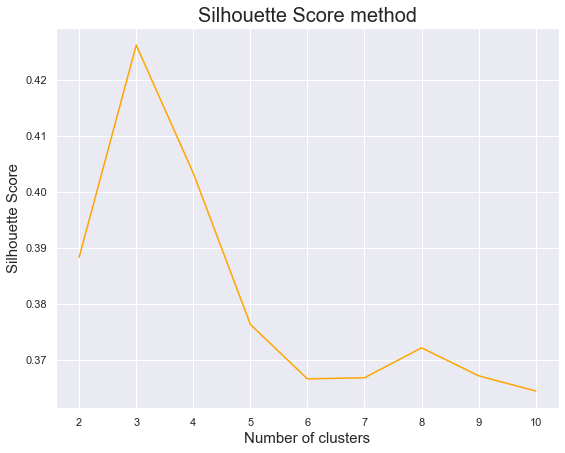

In [66]:
plt.figure(figsize = (9, 7))
plt.plot(range(2, 11), sse, color = 'orange')
plt.title('Silhouette Score method', fontsize = 20)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Silhouette Score', fontsize = 15)
plt.show()

In [67]:
model1 = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10)
model1.fit(x1)

KMeans(n_clusters=3, n_init=10)

In [68]:
clusters = model1.labels_
clusters

array([2, 0, 1, ..., 2, 1, 1])

In [69]:
data['Clusters'] = clusters

In [70]:
data.head()

Age  Gender Loyalty Member Product Type  Rating Order Status  \
0   53    Male             No   Smartphone       2    Cancelled   
1   53    Male             No       Tablet       3    Completed   
3   41    Male            Yes   Smartphone       2    Completed   
7   25  Female             No       Laptop       3    Completed   
8   24    Male             No   Smartphone       2    Cancelled   

  Payment Method  Total Price  Unit Price  Quantity Shipping Type  \
0    Credit Card      5538.33      791.19         7      Standard   
1         PayPal       741.09      247.03         3     Overnight   
3           Cash      3164.76      791.19         4     Overnight   
7     Debit Card      4175.64      463.96         9     Overnight   
8     Debit Card      5538.33      791.19         7      Standard   

   Add-on Total  Clusters  
0         40.21         2  
1         26.09         0  
3         60.16         1  
7         75.33         1  
8         43.05         2

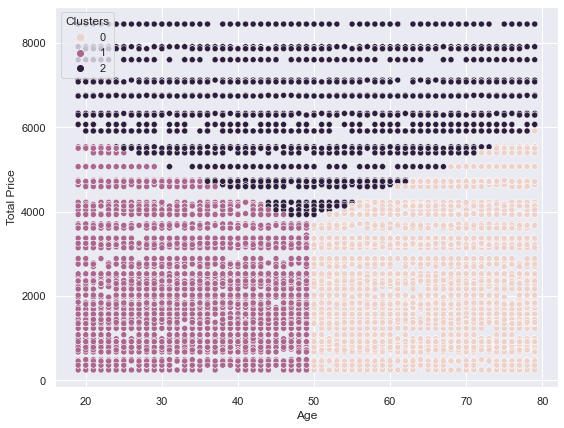

In [71]:
plt.figure(figsize = (9, 7))
sns.scatterplot(data = data, x = 'Age', y = 'Total Price', hue = 'Clusters')
plt.show()

In [72]:
model2 = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10)
model2.fit(x1)

KMeans(n_clusters=4, n_init=10)

In [73]:
clusters2 = model2.labels_
clusters2

array([1, 3, 0, ..., 1, 0, 0])

In [74]:
data['Cluster2'] = clusters2

In [75]:
data.head()

Age  Gender Loyalty Member Product Type  Rating Order Status  \
0   53    Male             No   Smartphone       2    Cancelled   
1   53    Male             No       Tablet       3    Completed   
3   41    Male            Yes   Smartphone       2    Completed   
7   25  Female             No       Laptop       3    Completed   
8   24    Male             No   Smartphone       2    Cancelled   

  Payment Method  Total Price  Unit Price  Quantity Shipping Type  \
0    Credit Card      5538.33      791.19         7      Standard   
1         PayPal       741.09      247.03         3     Overnight   
3           Cash      3164.76      791.19         4     Overnight   
7     Debit Card      4175.64      463.96         9     Overnight   
8     Debit Card      5538.33      791.19         7      Standard   

   Add-on Total  Clusters  Cluster2  
0         40.21         2         1  
1         26.09         0         3  
3         60.16         1         0  
7         75.33         1         2  
8         43.05         2         2

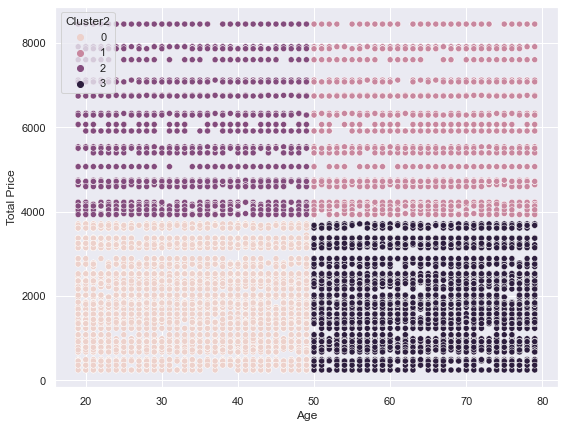

In [76]:
plt.figure(figsize = (9, 7))
sns.scatterplot(data = data, x = 'Age', y = 'Total Price', hue = 'Cluster2')
plt.show()

In [78]:
model3 = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10)
model3.fit(x1)

KMeans(n_clusters=5, n_init=10)

In [79]:
data['clusters3'] = model3.labels_

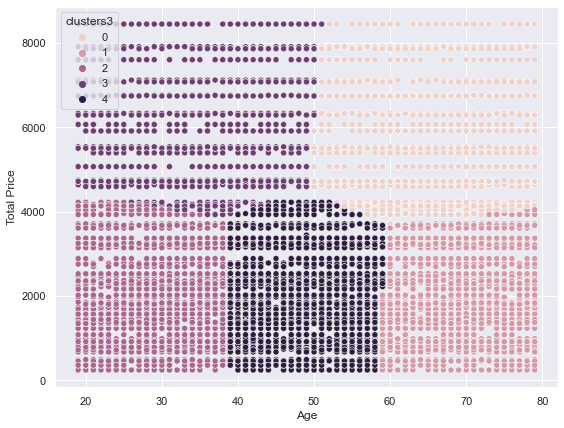

In [80]:
plt.figure(figsize = (9, 7))
sns.scatterplot(data = data, x = 'Age', y = 'Total Price', hue = 'clusters3')
plt.show()

In [83]:
data['Clusters'].value_counts()

Clusters
1    4073
0    3878
2    2307
Name: count, dtype: int64

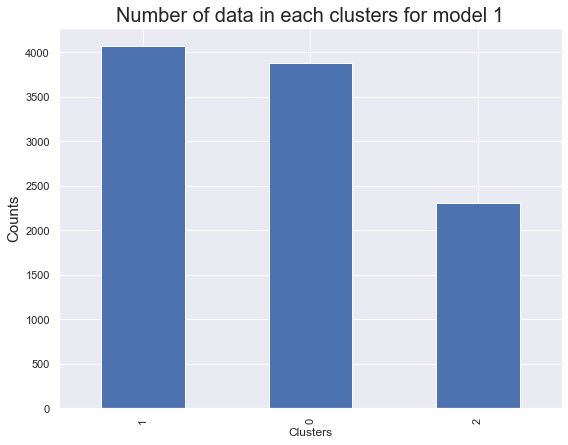

In [85]:
data['Clusters'].value_counts().plot(kind = 'bar', figsize = (9, 7))
plt.title('Number of data in each clusters for model 1', fontsize = 20)
plt.ylabel('Counts', fontsize = 15)
plt.show()

In [86]:
data['Cluster2'].value_counts()

Cluster2
0    3529
3    3296
2    1718
1    1715
Name: count, dtype: int64

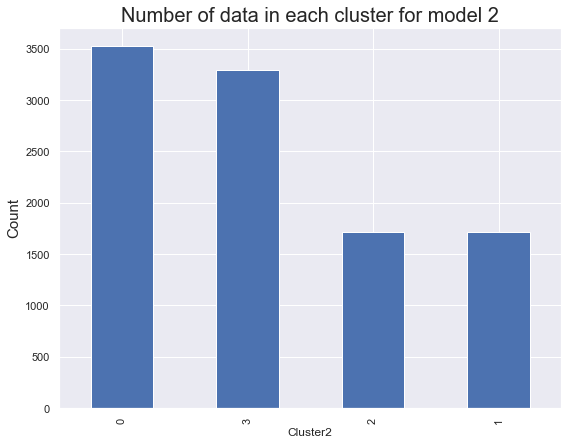

In [87]:
data['Cluster2'].value_counts().plot(kind = 'bar', figsize = (9, 7))
plt.title('Number of data in each cluster for model 2', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [89]:
data['clusters3'].value_counts()

clusters3
4    2437
2    2407
1    2296
0    1601
3    1517
Name: count, dtype: int64

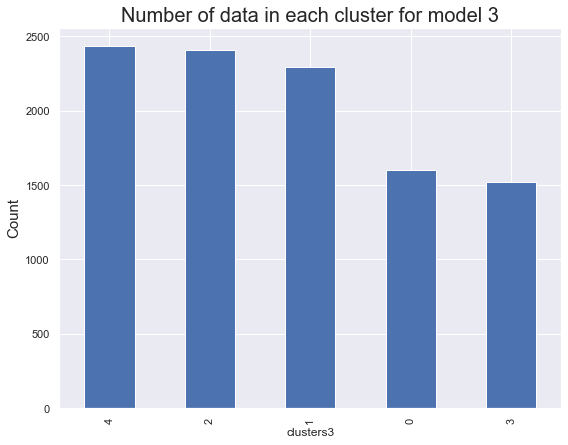

In [90]:
data['clusters3'].value_counts().plot(kind = 'bar', figsize = (9, 7))
plt.title('Number of data in each cluster for model 3', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [91]:
data.head()

Age  Gender Loyalty Member Product Type  Rating Order Status  \
0   53    Male             No   Smartphone       2    Cancelled   
1   53    Male             No       Tablet       3    Completed   
3   41    Male            Yes   Smartphone       2    Completed   
7   25  Female             No       Laptop       3    Completed   
8   24    Male             No   Smartphone       2    Cancelled   

  Payment Method  Total Price  Unit Price  Quantity Shipping Type  \
0    Credit Card      5538.33      791.19         7      Standard   
1         PayPal       741.09      247.03         3     Overnight   
3           Cash      3164.76      791.19         4     Overnight   
7     Debit Card      4175.64      463.96         9     Overnight   
8     Debit Card      5538.33      791.19         7      Standard   

   Add-on Total  Clusters  Cluster2  clusters3  
0         40.21         2         1          0  
1         26.09         0         3          4  
3         60.16         1         0          4  
7         75.33         1         2          2  
8         43.05         2         2          3

In [92]:
data.drop(columns = ['Clusters', 'clusters3'], axis = 1, inplace = True)

In [94]:
data['Cluster'] = data['Cluster2']

In [95]:
data.drop(columns = ['Cluster2'], axis = 'columns', inplace = True)

In [96]:
data.head()

Age  Gender Loyalty Member Product Type  Rating Order Status  \
0   53    Male             No   Smartphone       2    Cancelled   
1   53    Male             No       Tablet       3    Completed   
3   41    Male            Yes   Smartphone       2    Completed   
7   25  Female             No       Laptop       3    Completed   
8   24    Male             No   Smartphone       2    Cancelled   

  Payment Method  Total Price  Unit Price  Quantity Shipping Type  \
0    Credit Card      5538.33      791.19         7      Standard   
1         PayPal       741.09      247.03         3     Overnight   
3           Cash      3164.76      791.19         4     Overnight   
7     Debit Card      4175.64      463.96         9     Overnight   
8     Debit Card      5538.33      791.19         7      Standard   

   Add-on Total  Cluster  
0         40.21        1  
1         26.09        3  
3         60.16        0  
7         75.33        2  
8         43.05        2

In [104]:
data.corr(numeric_only = True)['Cluster'].sort_values(ascending = False)

Cluster         1.000000
Age             0.575765
Total Price     0.013814
Unit Price      0.008097
Quantity        0.003486
Rating         -0.004746
Add-on Total   -0.009781
Name: Cluster, dtype: float64

In [105]:
def customer_classification(data, model):
    x2 = data[['Age', 'Total Price', 'Cluster']]
    sc = MinMaxScaler(feature_range = (x2['Total Price'].min(), x2['Total Price'].max()))
    x2['Age'] = sc.fit_transform(x2[['Age']])
    X_train, X_test, y_train, y_test = train_test_split(x2[['Age', 'Total Price']], x2['Cluster'], test_size = 0.2, 
                                                       random_state = 101, stratify = x2['Cluster'], shuffle = True)
    model_f = model
    model_f.fit(X_train, y_train)
    y_pred = model_f.predict(X_test)
    print(classification_report(y_test, y_pred))
    plt.figure(figsize = (9, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size': 20}, fmt = 'd',
               cmap = 'Blues')
    plt.title(model, fontsize = 20)
    plt.xlabel('Predicted', fontsize = 15)
    plt.ylabel('Truth', fontsize = 15)
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       706
           1       1.00      1.00      1.00       343
           2       1.00      1.00      1.00       344
           3       1.00      1.00      1.00       659

    accuracy                           1.00      2052
   macro avg       1.00      1.00      1.00      2052
weighted avg       1.00      1.00      1.00      2052



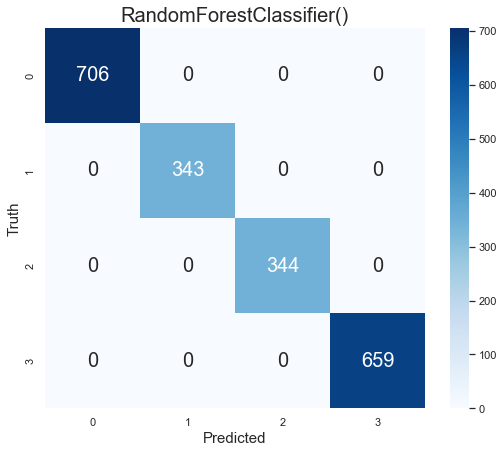

In [110]:
customer_classification(data, RandomForestClassifier())

# Clustering report
In this project, we classified the data based on age and total price. By using the elbow and silhouette methods and data visualization based on the done clustering, we can say that clustering the data into four clusters is a good choice. By clustering the data into four clusters, the data are clustered into the following clusters:

1- Customers who are young and have bought a small amount from the store.

2- Customers who are old and have bought a small amount from the store.

3- Customers who are young and have bought a large amount from the store.

4- Customers who are old and have bought a large amount from the store.

According to the analyzes that have already been done from the data and the resulting clustering, the following suggestions are made to increase the profit of the store:

1- The customers of the clusters who bought a small amount from the store should be advised to buy smartphones, which can be done by advertising SMS, etc., because smartphones are the most expensive among other goods and also, this It is possible that these customers bought a small amount from the store because they were not satisfied with the purchased goods.Customers are most satisfied with the purchase of smartphones, therefore, by purchasing a smartphone, the customer is likely to be satisfied with her purchase and is likely to buy more from the store.

2- As mentioned, there is a possibility that customers have bought less amounts from the store due to dissatisfaction with their purchase. Customers who have used express shipping to ship their products have the highest level of satisfaction with their purchases. Therefore, free express shipping can be considered for the transportation of goods for customers who have purchased a smaller amount from the store, so that they are more satisfied with their purchase and make their next purchases from the same store.

3- Due to the fact that the higher the price of a single product and placed in the customer's shopping cart, the customer's purchase amount will be higher, therefore, smart phones and smart watches can be offered to customers who have purchased a small amount from the store. because their amount is more than other products. But this case should also be kept in mind. Customers who pay more for a single product, their level of dissatisfaction also increases. Therefore, it is possible to make express shipping free for this type of purchase that is a single item with a high price, because customers who use this type of shipping will be satisfied with their purchase. Also, a free item or discount code can be assigned to these discounts.

4- Customers whose purchase amount was high had a higher level of dissatisfaction. These customers may buy smaller amounts from the store in their next purchases. Therefore, measures should be taken for these customers so that their satisfaction is gained and they are not included in the clusters of customers who made a small purchase from the store. For example, you can assign discount codes for them or consider gifts along with their purchases.

5- Whenever a new model of phones or smart watches is available in the store, it should be quickly suggested to the customers who buy high amounts from the store because these customers usually buy at a high cost from this store.

6- For customers who buy large amounts from the store, the cost of express shipping can be reduced, but not free, because these customers can afford to pay large amounts.

7- A strategy for all customers who buy from the store can be to offer them products with an average price for purchase, but the variety of products offered is high. Because usually customers who buy a single product with a high price will usually be dissatisfied with their purchase, but the more a customer encounters different offers and buys from them, the more he will buy from the store. For example, you can suggest the purchase of headphones to customers because customers who buy this product usually buy other products along with it.

8- Finally, according to the age of the customers and in which cluster they are, different policies should be considered. For example, by following the above suggestions, it is possible to offer smartphones at an average price to customers who are young and have purchased a smaller amount from the store, but along with that, offer them other products with a greater variety. , because at this age, they usually buy accessories such as smart watches and headphones. But for customers who have purchased a smaller amount from the store, you should offer smartphones that have a higher price and offer less to buy headphones or smart watches because at this age, a customer is less than headphones or smart watches or lips. He buys tops and uses smartphones more. Therefore, elderly customers may only consider buying a smartphone, so it is better to offer phones that have a higher price to these customers first.

9- We know that whenever a customer has bought headphones, he has bought more other products along with it. By buying more goods from the store, the purchase amount will also increase. Also, younger customers usually buy more products like headphones. According to this issue, it is possible to suggest buying headphones with a medium price to customers who are young and their purchase amount is small, because these customers probably cannot afford high-priced headphones, but they may be able to Buying headphones with an average price will encourage them to buy other products along with it.